**1. Problem Definition:**
The goal is to predict the chance of survival of those hospitalized in intensive care in the first 24 hours.

In [2]:
import numpy as np
np.random.seed(42)


#**2. Data Collection and Understanding:**
The data is collected from the Kaggle Competition 2020. We are in the process of getting to know and understand the data.

In [3]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# loading the data
data_train = pd.read_csv("training_v2.csv")
data_test = pd.read_csv("unlabeled.csv")
data_info = pd.read_csv("WiDS Datathon 2020 Dictionary.csv")
data_sol = pd.read_csv("solution_template.csv")
data_sample = pd.read_csv("samplesubmission.csv")

In [5]:
# brief description of training data
data_train.hospital_death.unique()


array([0, 1])

**Observation:** This DataFrame provides information about the features used to create our data.

In [6]:
# understanding th shape of the data
print("data train shape:", data_train.shape)
print("data test shape:", data_test.shape)
print("data columns shape:", data_info.shape)


data train shape: (91713, 186)
data test shape: (39308, 186)
data columns shape: (188, 6)


**Observation :**
Our data is large and contains many features and sample points





In [7]:
data_info['Data Type'].value_counts()

Data Type
numeric    153
binary      16
string      12
integer      7
Name: count, dtype: int64

**Comments:**
*   Each category describes which variable names are included.
*   We observe that the variable names have various data types, which indicates that we need to handle them appropriately.
*   We see that the variable names have different types of units, suggesting that numeric data should be normalized or scaled?!









In [8]:
# deep understanding of the features datatype - extracting their name
objects = list(data_train.select_dtypes(include = "object").columns)
n_objects = len(objects)
print("list of all objects features in the data:\n",objects,"\n", n_objects)
print()
numbers = list(data_train.select_dtypes(include= "number").columns)
n_numbers = len(numbers)
print(" list of all integers features in the data:\n",numbers,"\n",n_numbers)
print()

# checking overall features:
data_train.shape[1] == n_numbers + n_objects

# our data is mostly numbers and a few objects

list of all objects features in the data:
 ['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem'] 
 8

 list of all integers features in the data:
 ['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'height', 'icu_id', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', '

True

plotting for exibit features type distribtion

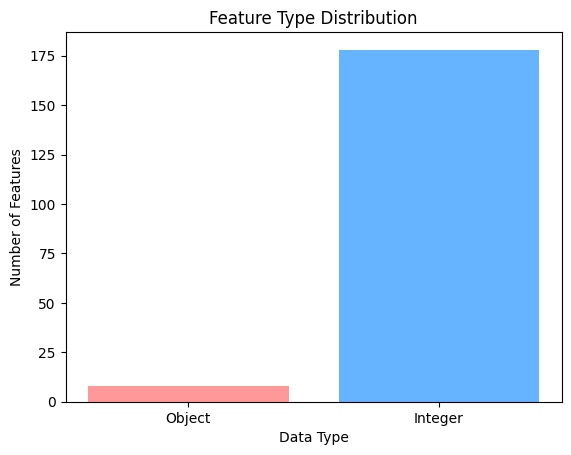

In [9]:
# data to plot
data_types = ['Object', 'Integer']
counts = [n_objects, n_numbers]

# Bar Plot
plt.bar(data_types, counts, color=['#ff9999','#66b3ff'])
plt.xlabel('Data Type')
plt.ylabel('Number of Features')
plt.title('Feature Type Distribution')

plt.show()


**Comment:**
It appears that most of our data consists of numeric types (int, float, category, binary, etc.). We need to consider how to handle categorical variables and whether some features should be dropped.

In [10]:
# getting information about the features data type
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


plotting for exibit target data distribution


target =  [0 1]
hospital_death
0    83798
1     7915
Name: count, dtype: int64


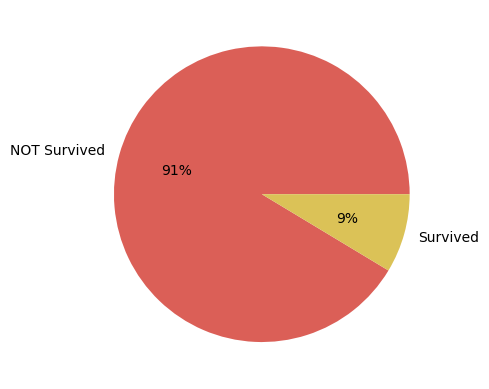

In [11]:
# identify target
print("target = ",data_train.hospital_death.unique())
# our target output has binary

#identify traget values counts
output = data_train.hospital_death.value_counts()
print(output)

# visualizing target using pie chart
label = ['NOT Survived','Survived']
palette_color = sns.color_palette("hls", 8)
plt.pie(output, labels=label, colors=palette_color, autopct='%.0f%%')
plt.show()


**Comment :** We observe that the number of samples with an output of 0 is significantly greater than those with an output of 1. This indicates that our data is highly imbalanced due to the substantial disparity in the number of samples for each class. We will address this imbalance after completing the data cleaning phase.


#**3. Data Cleaning and Preprocessing:**
1. Handle Missing Values:
2. Encode Categorical Variables:
3. Feature Engineering and Selection:
4. Address Imbalanced Data:

###Pre work with data

In [12]:
# making a copy of our data to preserve the original datasets
dtrain = data_train.copy(deep=True)
dtest = data_test.copy(deep=True)
dinfo = data_info.copy(deep=False)


In [13]:
# save target coulmn

ytrain = dtrain['hospital_death']
dtrain = dtrain.drop('hospital_death', axis=1)

ytest = dtest['hospital_death']
dtest = dtest.drop('hospital_death', axis=1)

In [14]:
# Checking for duplicating rows
print(dtrain.duplicated().sum())
print(dtest.duplicated().sum())

0
0


Training Data - Missing Values data frame

*   List item
*   List item


We are creating a DataFrame to collect and organize all information about missing values in our data.

In [15]:
# Looking for missing values in the data train
pd.set_option('display.max_rows', None)

# Show only columns with missing values
MissingDTrain = dtrain.isnull().sum()
MissingDTrain = MissingDTrain[MissingDTrain > 0]
data_types_train = dtrain.dtypes[MissingDTrain.index]

missing_info_train = pd.DataFrame({
    'Variable Name': MissingDTrain.index,
    'HowManyMissingValues': MissingDTrain.values,
    'DataTypeName': data_types_train.values,
    'PrecentageOfMissingValues':(MissingDTrain.values/dtrain.shape[0])*100
                                  })

# Create a mapping from 'Variable Name' to the desired column in data_info
mapping = data_info.set_index('Variable Name')['Data Type']

# Add the new column to missing_info_train
missing_info_train['Data Type'] = missing_info_train['Variable Name'].map(mapping)

# Sort the DataFrame by the 'HowManyMissingValues' column in ascending order
missing_info_train = missing_info_train.sort_values(by='HowManyMissingValues', ascending=True)

# Print the total number of missing values
print("HowManyMissingValues = ", missing_info_train['HowManyMissingValues'].sum())

# Display the updated DataFrame
missing_info_train



HowManyMissingValues =  5743492


Variable Name  HowManyMissingValues DataTypeName  \
3                           gender                    25       object   
6                 icu_admit_source                   112       object   
41                d1_heartrate_max                   145      float64   
42                d1_heartrate_min                   145      float64   
56                    d1_sysbp_min                   159      float64   
55                    d1_sysbp_max                   159      float64   
38                   d1_diasbp_min                   165      float64   
37                   d1_diasbp_max                   165      float64   
45                      d1_mbp_max                   220      float64   
46                      d1_mbp_min                   220      float64   
52                     d1_spo2_min                   333      float64   
51                     d1_spo2_max                   333      float64   
49                 d1_resprate_max                   385      float64   
50                 d1_resprate_min                   385      float64   
171                       lymphoma                   715      float64   
33               ventilated_apache                   715      float64   
23                intubated_apache                   715      float64   
166                      cirrhosis                   715      float64   
165                           aids                   715      float64   
167              diabetes_mellitus                   715      float64   
168                hepatic_failure                   715      float64   
169              immunosuppression                   715      float64   
11                      arf_apache                   715      float64   
170                       leukemia                   715      float64   
172    solid_tumor_with_metastasis                   715      float64   
21               heart_rate_apache                   878      float64   
24                      map_apache                   994      float64   
58        d1_sysbp_noninvasive_min                  1027      float64   
57        d1_sysbp_noninvasive_max                  1027      float64   
18               gcs_unable_apache                  1037      float64   
40       d1_diasbp_noninvasive_min                  1040      float64   
39       d1_diasbp_noninvasive_max                  1040      float64   
10             apache_3j_diagnosis                  1101      float64   
29                 resprate_apache                  1234      float64   
4                           height                  1334      float64   
2                        ethnicity                  1395       object   
47          d1_mbp_noninvasive_max                  1479      float64   
48          d1_mbp_noninvasive_min                  1479      float64   
174            apache_2_bodysystem                  1662       object   
9               apache_2_diagnosis                  1662      float64   
173           apache_3j_bodysystem                  1662       object   
19               gcs_verbal_apache                  1901      float64   
17                gcs_motor_apache                  1901      float64   
16                 gcs_eyes_apache                  1901      float64   
60                     d1_temp_min                  2324      float64   
59                     d1_temp_max                  2324      float64   
7                           weight                  2720      float64   
67                h1_heartrate_max                  2790      float64   
68                h1_heartrate_min                  2790      float64   
1                              bmi                  3429      float64   
82                    h1_sysbp_min                  3611      float64   
81                    h1_sysbp_max                  3611      float64   
64                   h1_diasbp_min                  3619      float64   
63                   h1_diasbp_max                  3619      float64   
31    

In [16]:
# understanding what type of features having missing values
miss = missing_info_train.groupby('DataTypeName')['Variable Name'].count().reset_index()
print("HowManyMissingFeatures = ",miss['Variable Name'].sum())
miss

HowManyMissingFeatures =  175


DataTypeName  Variable Name
0      float64            169
1       object              6

**Observation:** Most of our missing values are in numeric data types.

Data train - Missing values - Numeric

In [17]:
# How many float numbers features are missing in the data train
NoMissTrain = missing_info_train[missing_info_train['DataTypeName'] == 'float64']

# All missing values Variable Names of type float:
list(NoMissTrain['Variable Name'])


['d1_heartrate_max',
 'd1_heartrate_min',
 'd1_sysbp_min',
 'd1_sysbp_max',
 'd1_diasbp_min',
 'd1_diasbp_max',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_spo2_min',
 'd1_spo2_max',
 'd1_resprate_max',
 'd1_resprate_min',
 'lymphoma',
 'ventilated_apache',
 'intubated_apache',
 'cirrhosis',
 'aids',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'arf_apache',
 'leukemia',
 'solid_tumor_with_metastasis',
 'heart_rate_apache',
 'map_apache',
 'd1_sysbp_noninvasive_min',
 'd1_sysbp_noninvasive_max',
 'gcs_unable_apache',
 'd1_diasbp_noninvasive_min',
 'd1_diasbp_noninvasive_max',
 'apache_3j_diagnosis',
 'resprate_apache',
 'height',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'apache_2_diagnosis',
 'gcs_verbal_apache',
 'gcs_motor_apache',
 'gcs_eyes_apache',
 'd1_temp_min',
 'd1_temp_max',
 'weight',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'bmi',
 'h1_sysbp_min',
 'h1_sysbp_max',
 'h1_diasbp_min',
 'h1_diasbp_max',
 'temp_apache',
 'h1_spo2_max',
 'h1_spo2_min',


Data train - Missing values - Object

In [18]:
# How many object numbers features are missing in the data train
ObjMissTrain = missing_info_train[missing_info_train['DataTypeName'] == 'object']

# All missing values Variable Names of type object:
list(ObjMissTrain['Variable Name'])

['gender',
 'icu_admit_source',
 'ethnicity',
 'apache_2_bodysystem',
 'apache_3j_bodysystem',
 'hospital_admit_source']

In [19]:
# Identify the features with incorrect data types in missing_info_train
condition = (missing_info_train['DataTypeName'] == 'float64') & (missing_info_train['Data Type'] == 'string')
missing_info_train.loc[condition, 'Data Type'] = 'numeric'
wrong_features_datatype = missing_info_train[condition]
wrong_features = wrong_features_datatype['Variable Name']

# Update the data types in dtrain and dtest
dtrain[wrong_features] = dtrain[wrong_features].astype('float64')
dtest[wrong_features] = dtest[wrong_features].astype('float64')

# need also to update in the info file
# Update the info file to reflect the correct data type
dinfo.loc[dinfo['Variable Name'].isin(wrong_features), 'Data Type'] = 'numeric'

**Observation:**
1. Numeric and integer values with missing data should be replaced with the mean or median, depending on the analysis of their distribution (e.g., normal distribution).
2. Binary values should be replaced with the mode, as they are categorical.
3. Consider whether to drop features with missing string values, especially if they are not critical or if the proportion of missing values is high.

Testing Data - Missing values data frame
We are creating a DataFrame to collect and organize all information about missing values in our data.

In [20]:
# Looking for missing values in the data test
pd.set_option('display.max_rows', None)

# Show only columns with missing values
MissingDTest = dtest.isnull().sum()
MissingDTest = MissingDTest[MissingDTest > 0]
MissingDTest

data_types_test = dtest.dtypes[MissingDTest.index]

missing_info_test = pd.DataFrame({
    'Variable Name': MissingDTest.index,
    'HowManyMissingValues': MissingDTest.values,
    'DataTypeName': data_types_test.values,
    'PrecentageOfMissingValues':(MissingDTest.values/dtest.shape[0])*100
                            })

# Create a mapping from 'Variable Name' to the desired column in data_info
mapping = data_info.set_index('Variable Name')['Data Type']

# Add the new column to missing_info_train
missing_info_test['Data Type'] = missing_info_test['Variable Name'].map(mapping)

# Sort the DataFrame by the 'HowManyMissingValues' column in ascending order
missing_info_test = missing_info_test.sort_values(by='HowManyMissingValues', ascending=True)

# Print the total number of missing values
print("HowManyMissingValues = ", missing_info_test['HowManyMissingValues'].sum())
missing_info_test

HowManyMissingValues =  2387194


Variable Name  HowManyMissingValues DataTypeName  \
3                           gender                    15       object   
46                      d1_mbp_min                   100      float64   
45                      d1_mbp_max                   100      float64   
38                   d1_diasbp_min                   104      float64   
37                   d1_diasbp_max                   104      float64   
55                    d1_sysbp_max                   104      float64   
56                    d1_sysbp_min                   104      float64   
41                d1_heartrate_max                   111      float64   
42                d1_heartrate_min                   111      float64   
6                 icu_admit_source                   115       object   
2                        ethnicity                   171       object   
166                      cirrhosis                   179      float64   
167              diabetes_mellitus                   179      float64   
168                hepatic_failure                   179      float64   
23                intubated_apache                   179      float64   
170                       leukemia                   179      float64   
165                           aids                   179      float64   
171                       lymphoma                   179      float64   
33               ventilated_apache                   179      float64   
172    solid_tumor_with_metastasis                   179      float64   
169              immunosuppression                   179      float64   
11                      arf_apache                   179      float64   
51                     d1_spo2_max                   195      float64   
52                     d1_spo2_min                   195      float64   
50                 d1_resprate_min                   294      float64   
49                 d1_resprate_max                   294      float64   
24                      map_apache                   301      float64   
21               heart_rate_apache                   306      float64   
29                 resprate_apache                   449      float64   
18               gcs_unable_apache                   546      float64   
39       d1_diasbp_noninvasive_max                   598      float64   
40       d1_diasbp_noninvasive_min                   598      float64   
58        d1_sysbp_noninvasive_min                   598      float64   
57        d1_sysbp_noninvasive_max                   598      float64   
10             apache_3j_diagnosis                   637      float64   
4                           height                   750      float64   
48          d1_mbp_noninvasive_min                   753      float64   
47          d1_mbp_noninvasive_max                   753      float64   
7                           weight                   764      float64   
173           apache_3j_bodysystem                   896       object   
9               apache_2_diagnosis                   896      float64   
174            apache_2_bodysystem                   896       object   
1                              bmi                  1086      float64   
19               gcs_verbal_apache                  1163      float64   
17                gcs_motor_apache                  1163      float64   
16                 gcs_eyes_apache                  1163      float64   
68                h1_heartrate_min                  1325      float64   
67                h1_heartrate_max                  1325      float64   
0                              age                  1654      float64   
72                      h1_mbp_min                  1953      float64   
71                      h1_mbp_max                  1953      float64   
82                    h1_sysbp_min                  1962      float64   
81                    h1_sysbp_max                  1962      float64   
64                   h1_diasbp_min                  1962      float64   
63    

In [21]:
missing_info_test.groupby('DataTypeName')['Variable Name'].count().reset_index()

DataTypeName  Variable Name
0      float64            169
1       object              6

Data test - Missing values - Numeric

In [22]:
NoMissTest = missing_info_test[missing_info_test['DataTypeName'] == 'float64']

# All missing values Variable Names of type float:
list(NoMissTest['Variable Name'])

['d1_mbp_min',
 'd1_mbp_max',
 'd1_diasbp_min',
 'd1_diasbp_max',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'intubated_apache',
 'leukemia',
 'aids',
 'lymphoma',
 'ventilated_apache',
 'solid_tumor_with_metastasis',
 'immunosuppression',
 'arf_apache',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_resprate_min',
 'd1_resprate_max',
 'map_apache',
 'heart_rate_apache',
 'resprate_apache',
 'gcs_unable_apache',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_sysbp_noninvasive_min',
 'd1_sysbp_noninvasive_max',
 'apache_3j_diagnosis',
 'height',
 'd1_mbp_noninvasive_min',
 'd1_mbp_noninvasive_max',
 'weight',
 'apache_2_diagnosis',
 'bmi',
 'gcs_verbal_apache',
 'gcs_motor_apache',
 'gcs_eyes_apache',
 'h1_heartrate_min',
 'h1_heartrate_max',
 'age',
 'h1_mbp_min',
 'h1_mbp_max',
 'h1_sysbp_min',
 'h1_sysbp_max',
 'h1_diasbp_min',
 'h1_diasbp_max',
 'h1_spo2_min',
 'h1_spo2_max',
 'h1_respr

Data test - Missing values - Object

In [23]:
# How many object numbers features are missing in the data train
ObjMissTest = missing_info_test[missing_info_test['DataTypeName'] == 'object']

# All missing values Variable Names of type object:
list(ObjMissTest['Variable Name'])

['gender',
 'icu_admit_source',
 'ethnicity',
 'apache_3j_bodysystem',
 'apache_2_bodysystem',
 'hospital_admit_source']

**Note:** Transform features with DataTypeName = 'float' but Data Type = 'string' to prevent missing missing values tracking

In [24]:
# Identify the features with incorrect data types in missing_info_test
Condition = (missing_info_test['DataTypeName'] == 'float64') & (missing_info_test['Data Type'] == 'string')
missing_info_test.loc[Condition, 'Data Type'] = 'numeric'
Wrong_features_datatype = missing_info_test[Condition]
Wrong_features = Wrong_features_datatype['Variable Name']

# Update the data types in  dtest
dtest[Wrong_features] = dtest[Wrong_features].astype('float64')


Handling Missing data and Encode Categorical Variables:

###1. **Evaluate Handling of Missing Values**: Consider dropping features with missing string values if they are not critical or if the proportion of missing data is high.

Action :
* Drop features that have a high percentage of missing values.




Data Train

In [25]:
threshold_train = 80

# Filter the features where the percentage of missing values is greater than the threshold
features_to_drop_train = missing_info_train[missing_info_train['PrecentageOfMissingValues'] > threshold_train]
features_to_drop_train_list = list(features_to_drop_train['Variable Name'])

# Drop the features from dtrain
dtrain = dtrain.drop(features_to_drop_train_list, axis=1)

# Drop the corresponding rows from missing_info_train
missing_info_train = missing_info_train[~missing_info_train['Variable Name'].isin(features_to_drop_train_list)]


Data Test

In [26]:
threshold_test = 80

# Filter the features where the percentage of missing values is greater than the threshold
features_to_drop_test = missing_info_test[missing_info_test['PrecentageOfMissingValues'] > threshold_test]
features_to_drop_test_list = list(features_to_drop_test['Variable Name'])

# Drop the features from dtrain
dtest = dtest.drop(features_to_drop_test_list, axis=1)

# Drop the corresponding rows from missing_info_train
missing_info_test = missing_info_test[~missing_info_test['Variable Name'].isin(features_to_drop_test_list)]


###2. **Replace Missing Numeric and Integer Values**: Use the mean or median for imputation, based on the analysis of their distribution (e.g., normal distribution).
Action:
1. Plotting features to observe their disribution
2. Calculating Skewness of each feature to determaine computionally their distribution
3. Apply Mean/Median values based on results in step 2
4. Later dealing with features that werent identified well by Skewness
  

Train data - Remaning features based on their type



In [27]:
# Only Numeric
NumFeaturesTrain = missing_info_train[(missing_info_train['Data Type'] == 'numeric')|(missing_info_train['Data Type'] == 'integer')]
NumFeaturesTrain = list(NumFeaturesTrain['Variable Name'])
print(f'there are {len(NumFeaturesTrain)} features of Numeric')

# Only Binary
BinFeaturesTrain = missing_info_train[(missing_info_train['Data Type'] == 'binary')]
BinFeaturesTrain = list(BinFeaturesTrain['Variable Name'])
print(f'there are {len(BinFeaturesTrain)} features of Binary')

# Only object
CatFeaturesTrain = missing_info_train[missing_info_train['DataTypeName'] == 'object']
CatFeaturesTrain = list(CatFeaturesTrain['Variable Name'])
print(f'there are {len(CatFeaturesTrain)} features of Object')

there are 123 features of Numeric
there are 12 features of Binary
there are 6 features of Object


Test data - Remaning features based on their type

In [28]:
# Only Numeric
NumFeaturesTest = missing_info_test[(missing_info_test ['Data Type'] == 'numeric')|(missing_info_test['Data Type'] == 'integer')]
NumFeaturesTest = list(NumFeaturesTest['Variable Name'])
print(f'there are {len(NumFeaturesTest)} features of Numeric')
# Only Binary
BinFeaturesTest = missing_info_test[(missing_info_test['Data Type'] == 'binary')]
BinFeaturesTest = list(BinFeaturesTest['Variable Name'])
print(f'there are {len(BinFeaturesTest)} features of Binary')
# Only object
CatFeaturesTest = missing_info_test[missing_info_test['DataTypeName'] == 'object']
CatFeaturesTest = list(CatFeaturesTest['Variable Name'])
print(f'there are {len(CatFeaturesTest)} features of Object')

there are 143 features of Numeric
there are 12 features of Binary
there are 6 features of Object


1. Plotting features to observe their disribution
* Data Train

Plotting All Missing values Variable Names of type = Numbers 
Number of plots: 123


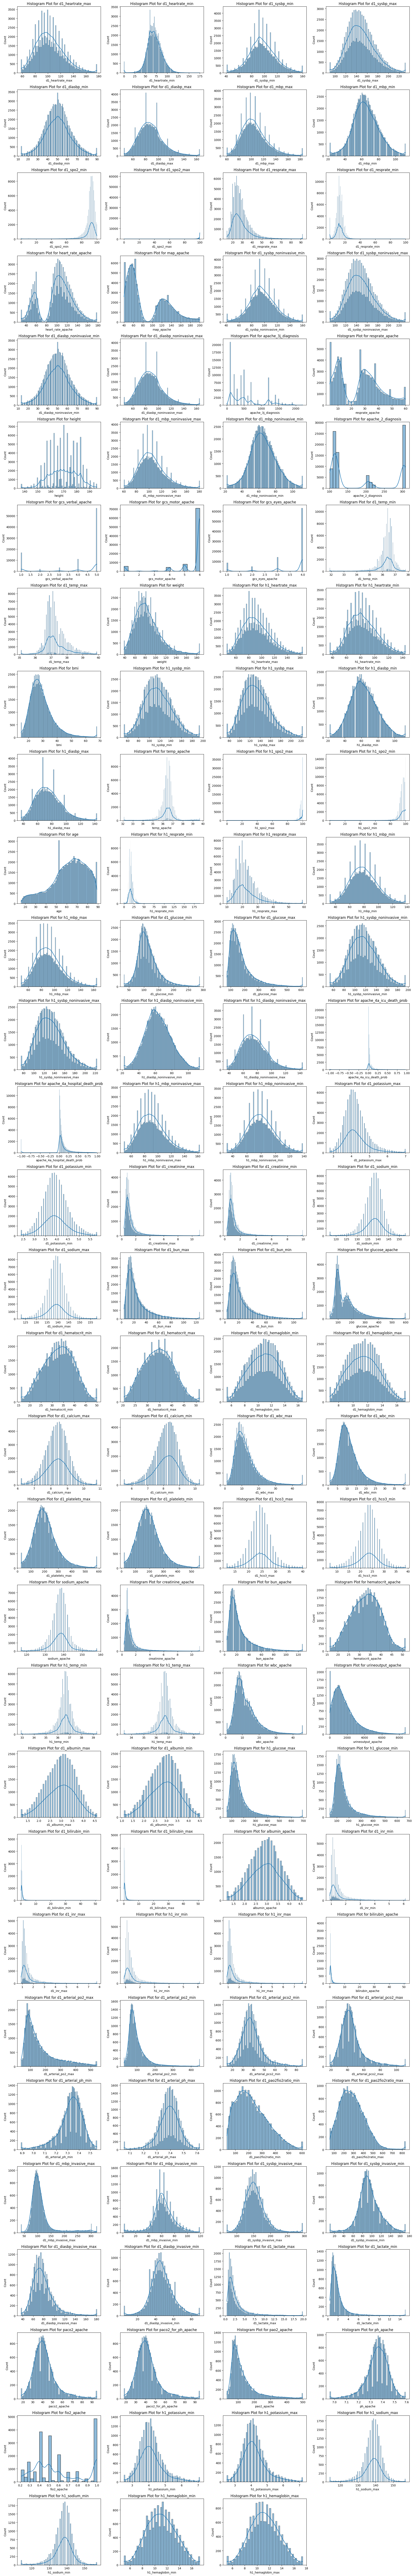

In [29]:

import seaborn as sns
import matplotlib.pyplot as plt
import math

print("Plotting All Missing values Variable Names of type = Numbers ")
# plotting numeric features
Features_train = NumFeaturesTrain

num_features = len(Features_train)
print(f'Number of plots: {num_features}')

cols = 4  # Number of columns in the grid
rows = math.ceil(num_features / cols)  # Number of rows in the grid

# Create figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows))
axes = axes.flatten()

for i, feature in enumerate(Features_train):
    sns.histplot(data = dtrain,x=feature, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram Plot for {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


1. Plotting features to observe their disribution
* Data Test



Plotting All Missing values Variable Names of type = Numbers 
Number of plots: 143


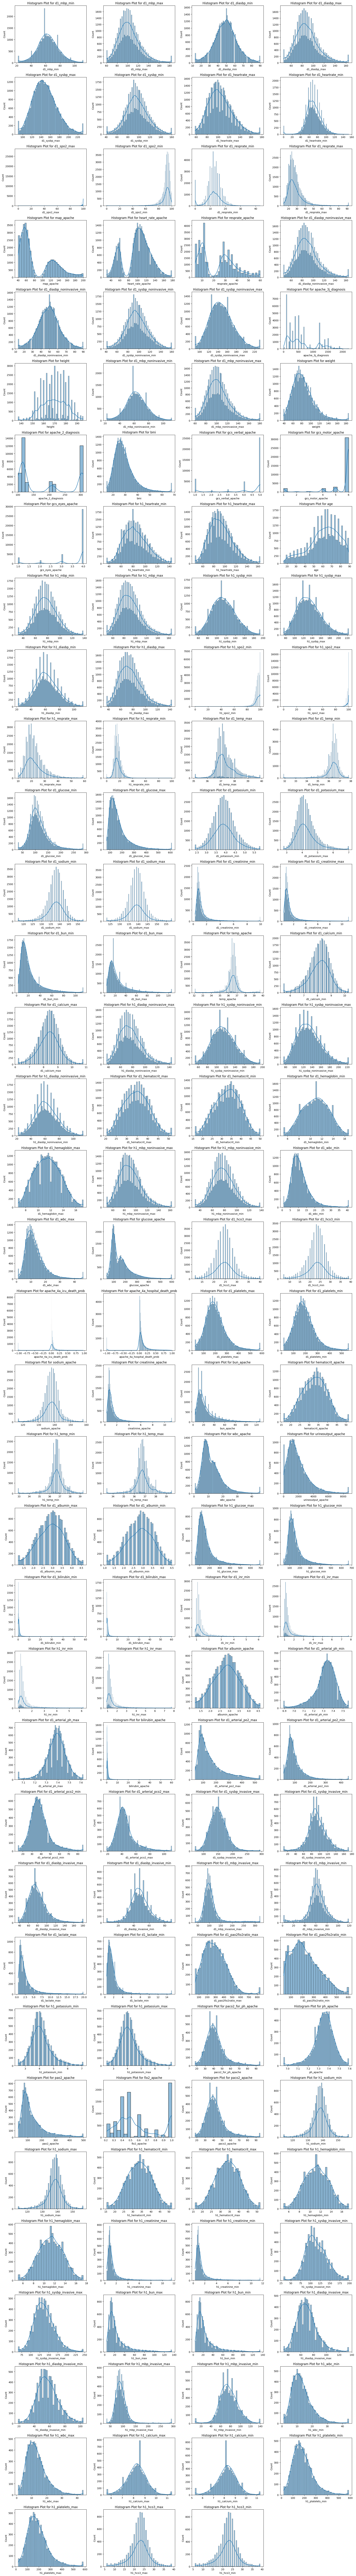

In [30]:
# creat the same code for test data
import seaborn as sns
import matplotlib.pyplot as plt
import math

print("Plotting All Missing values Variable Names of type = Numbers ")
# plotting numeric features
Features_test = NumFeaturesTest

num_features = len(Features_test)
print(f'Number of plots: {num_features}')

cols = 4  # Number of columns in the grid
rows = math.ceil(num_features / cols)  # Number of rows in the grid

# Create figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows))
axes = axes.flatten()

for i, feature in enumerate(Features_test):
    sns.histplot(data=dtest,x=feature, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram Plot for {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


**Observations :** It seems many features are normally distributed or skewed. to determaine their behaviour computationally, we apply a function to calculate the skewness of each feature in the data.

2. Calculating Skewness of each feature to determaine computionally their distribution

In [31]:
import pandas as pd
import numpy as np

def SkewNess(df, features, features_info_df):
  # storing features based on their filling type for missing values
    mean_replaced = []
    median_replaced = []
    not_replaced = []

    for column in features:
        missing_count = df[column].isnull().sum()

        if missing_count > 0:
            skewness = df[column].skew()

            if (skewness >= 0.5 and skewness < 1)  or (skewness <= -0.5 and skewness > -1) :  # Right-skewed/Left-skewed
                df[column].fillna(df[column].median(), inplace=True)
                median_replaced.append(column)
                print(f'{column}:  Skewness = {skewness}, Right-skewed/Left-skewed, filling {missing_count} missing values with median.')

            elif -0.5 < skewness < 0.5:   # almost normal distribution
                df[column].fillna(df[column].mean(), inplace=True)
                mean_replaced.append(column)
                print(f'{column}: Skewness = {skewness}, Approximately normal, filling {missing_count} missing values with mean.')

            else:                         # Neither skewed nor normal
                not_replaced.append(column)
                print(f'{column}: Skewness = {skewness}, Distribution not clear, no missing values replaced.')

            # Update the features_info_df with the imputation method used
            features_info_df.loc[features_info_df['Variable Name'] == column, 'Imputation Method'] = (
                'Median' if column in median_replaced else 'Mean' if column in mean_replaced else 'Not Replaced'
            )
        else:
            print(f'{column}: No missing values to replace.')

    return mean_replaced, median_replaced, not_replaced

Features_train = NumFeaturesTrain
Features_test = NumFeaturesTest

mean_replaced_train, median_replaced_train, not_replaced_train = SkewNess(dtrain,Features_train, missing_info_train)
mean_replaced_test, median_replaced_test, not_replaced_test = SkewNess(dtest, Features_test, missing_info_test)


d1_heartrate_max:  Skewness = 0.5733788664464559, Right-skewed/Left-skewed, filling 145 missing values with median.
d1_heartrate_min: Skewness = -0.11370930642086782, Approximately normal, filling 145 missing values with mean.
d1_sysbp_min: Skewness = 0.22187248980075644, Approximately normal, filling 159 missing values with mean.
d1_sysbp_max:  Skewness = 0.5062394289303531, Right-skewed/Left-skewed, filling 159 missing values with median.
d1_diasbp_min: Skewness = 0.09382416914864544, Approximately normal, filling 165 missing values with mean.
d1_diasbp_max:  Skewness = 0.8142118882558036, Right-skewed/Left-skewed, filling 165 missing values with median.
d1_mbp_max:  Skewness = 0.8007272628799076, Right-skewed/Left-skewed, filling 220 missing values with median.
d1_mbp_min: Skewness = 0.20856893332904217, Approximately normal, filling 220 missing values with mean.
d1_spo2_min: Skewness = -4.77425077150704, Distribution not clear, no missing values replaced.
d1_spo2_max: Skewness = -1

<ipython-input-31-f4ae4a635a1a>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_info_df.loc[features_info_df['Variable Name'] == column, 'Imputation Method'] = (


temp_apache:  Skewness = -0.9662992866832095, Right-skewed/Left-skewed, filling 4108 missing values with median.
h1_spo2_max: Skewness = -10.808824170077038, Distribution not clear, no missing values replaced.
h1_spo2_min: Skewness = -6.7696617066708065, Distribution not clear, no missing values replaced.
age:  Skewness = -0.6244742018411362, Right-skewed/Left-skewed, filling 4228 missing values with median.
h1_resprate_min: Skewness = 1.8806495966931218, Distribution not clear, no missing values replaced.
h1_resprate_max: Skewness = 1.5260155307553673, Distribution not clear, no missing values replaced.
h1_mbp_min: Skewness = 0.31594998706609906, Approximately normal, filling 4639 missing values with mean.
h1_mbp_max:  Skewness = 0.6739953056135446, Right-skewed/Left-skewed, filling 4639 missing values with median.
d1_glucose_min: Skewness = 1.3817086272879808, Distribution not clear, no missing values replaced.
d1_glucose_max: Skewness = 2.0576270134750527, Distribution not clear, no

<ipython-input-31-f4ae4a635a1a>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_info_df.loc[features_info_df['Variable Name'] == column, 'Imputation Method'] = (


height: Skewness = -0.10647664468297531, Approximately normal, filling 750 missing values with mean.
d1_mbp_noninvasive_min: Skewness = 0.11365931355694062, Approximately normal, filling 753 missing values with mean.
d1_mbp_noninvasive_max:  Skewness = 0.7519585857662232, Right-skewed/Left-skewed, filling 753 missing values with median.
weight: Skewness = 1.0994121070414895, Distribution not clear, no missing values replaced.
apache_2_diagnosis:  Skewness = 0.5002570582845984, Right-skewed/Left-skewed, filling 896 missing values with median.
bmi: Skewness = 1.530858566449645, Distribution not clear, no missing values replaced.
gcs_verbal_apache: Skewness = -1.4069342514367802, Distribution not clear, no missing values replaced.
gcs_motor_apache: Skewness = -2.8480779338800497, Distribution not clear, no missing values replaced.
gcs_eyes_apache: Skewness = -1.9393966064006705, Distribution not clear, no missing values replaced.
h1_heartrate_min: Skewness = 0.40870710650557796, Approxima

3. Apply Mean/Median values based on results in step 2

Summary for features updating

In [32]:
print("Results for Training Data :")
print(f'Mean Replaced Missing values Feature list : {mean_replaced_train}')
print(f'Median Replaced Missing values Feature list : {median_replaced_train}')
print(f'Not Replaced Missing values Feature list : {not_replaced_train}')
print()
print("Results for Testing Data :")
print(f'Mean Replaced Missing values Feature list : {mean_replaced_test}')
print(f'Median Replaced Missing values Feature list : {median_replaced_test}')
print(f'Not Replaced Missing values Feature list : {not_replaced_test}')


Results for Training Data :
Mean Replaced Missing values Feature list : ['d1_heartrate_min', 'd1_sysbp_min', 'd1_diasbp_min', 'd1_mbp_min', 'd1_resprate_min', 'heart_rate_apache', 'd1_sysbp_noninvasive_min', 'd1_diasbp_noninvasive_min', 'resprate_apache', 'height', 'd1_mbp_noninvasive_min', 'h1_heartrate_min', 'h1_sysbp_min', 'h1_diasbp_min', 'h1_mbp_min', 'h1_sysbp_noninvasive_min', 'h1_diasbp_noninvasive_min', 'h1_mbp_noninvasive_min', 'd1_potassium_min', 'd1_sodium_max', 'd1_hematocrit_min', 'd1_hematocrit_max', 'd1_hemaglobin_min', 'd1_hemaglobin_max', 'd1_calcium_max', 'd1_calcium_min', 'd1_hco3_max', 'd1_hco3_min', 'sodium_apache', 'hematocrit_apache', 'h1_temp_max', 'd1_albumin_max', 'd1_albumin_min', 'albumin_apache', 'd1_mbp_invasive_min', 'd1_sysbp_invasive_min', 'd1_diasbp_invasive_min', 'fio2_apache', 'h1_hemaglobin_min', 'h1_hemaglobin_max']
Median Replaced Missing values Feature list : ['d1_heartrate_max', 'd1_sysbp_max', 'd1_diasbp_max', 'd1_mbp_max', 'map_apache', 'd1_s

In [33]:
# what and how many features where not replaced, and left to be replaced by imputer
print(f'Not Replaced Missing values Feature list : {not_replaced_train}, \nnumber of features left no fill = {len(not_replaced_train)}')
print(f'Not Replaced Missing values Feature list : {not_replaced_test},\nnumber of features left no fill = {len(not_replaced_test)}')


Not Replaced Missing values Feature list : ['d1_spo2_min', 'd1_spo2_max', 'd1_resprate_max', 'apache_3j_diagnosis', 'gcs_verbal_apache', 'gcs_motor_apache', 'gcs_eyes_apache', 'd1_temp_min', 'weight', 'bmi', 'h1_spo2_max', 'h1_spo2_min', 'h1_resprate_min', 'h1_resprate_max', 'd1_glucose_min', 'd1_glucose_max', 'apache_4a_icu_death_prob', 'apache_4a_hospital_death_prob', 'd1_potassium_max', 'd1_creatinine_max', 'd1_creatinine_min', 'd1_bun_max', 'd1_bun_min', 'glucose_apache', 'd1_wbc_max', 'd1_wbc_min', 'd1_platelets_max', 'creatinine_apache', 'bun_apache', 'wbc_apache', 'urineoutput_apache', 'h1_glucose_max', 'h1_glucose_min', 'd1_bilirubin_min', 'd1_bilirubin_max', 'd1_inr_min', 'd1_inr_max', 'h1_inr_min', 'h1_inr_max', 'bilirubin_apache', 'd1_arterial_po2_max', 'd1_arterial_po2_min', 'd1_arterial_pco2_min', 'd1_arterial_pco2_max', 'd1_arterial_ph_min', 'd1_mbp_invasive_max', 'd1_sysbp_invasive_max', 'd1_diasbp_invasive_max', 'd1_lactate_max', 'd1_lactate_min', 'paco2_apache', 'paco2

**Observation :** Given that imputers like KNNImputer and IterativeImputer are time-consuming and computationally expensive, we cannot use them to replace the remaining missing values that we couldn’t address in previous sections. Instead, based on our observations of the plotted distributions, we will assume that all features exhibit skewness and proceed by replacing the remaining missing values with the median.

In [34]:
# replacing rest missing values with median

# Fill missing values in training data
for feature in not_replaced_train:
    median_value = dtrain[feature].median()
    dtrain[feature].fillna(median_value, inplace=True)
    missing_info_train.loc[missing_info_train['Variable Name'].isin(not_replaced_train), 'Imputation Method'] = 'Median Second Round'

# Fill missing values in test data
for feature in not_replaced_test:
    median_value = dtest[feature].median()
    dtest[feature].fillna(median_value, inplace=True)
    missing_info_test.loc[missing_info_test['Variable Name'].isin(not_replaced_test), 'Imputation Method'] = 'Median Second Round'



###3. **Replace Missing Binary Values**: Use the mode for imputation, as these are categorical.
Action :
1. Binary features are rereplaced with Mode
2. Categorical features are replaced with Mode - Most Frequent  
3. Categorical features are encoded based on their level of cardinality

1. Binary features are rereplaced with Mode

In [35]:
# Replace binary features with mode

def Impute_Binary(df, features,missing_list):
  for feature in features:
    mode_value = df[feature].mode()[0]
    df[feature].fillna(mode_value, inplace=True)
    missing_list.loc[missing_list['Variable Name'] == feature, 'Imputation Method'] = 'Mode'
  return missing_list

missing_info_train = Impute_Binary(dtrain,BinFeaturesTrain,missing_info_train)
print()
missing_info_test = Impute_Binary(dtest,BinFeaturesTest,missing_info_test)

**Observation:** Binary features have been replaced with mode values.Additionally, for object features, encoding should be applied before proceeding with further imputation or analysis.

 Pre Work :
 Filling missing values for categorical features with 'Unknown' before encoding and with the most frequent

2. Categorical features are replaced with Mode - Most Frequent

In [36]:
from sklearn.impute import SimpleImputer

# Fill missing values with a new category 'Unknown'
def fill_with_unknown(df, features):
    imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
    for feature in features:
        if feature in df.columns:
            df[[feature]] = imputer.fit_transform(df[[feature]])
        else:
            print(f"Feature {feature} not found in DataFrame.")

# Fill 'Unknown' values with the most frequent value
def fill_unknown_with_mode(df, features, mode_dict):
    for feature in features:
        if feature in df.columns:
            mode_value = mode_dict.get(feature)
            if mode_value is not None:
                df[feature].replace('Unknown', mode_value, inplace=True)
            else:
                print(f"Mode value for feature {feature} not found.")
        else:
            print(f"Feature {feature} not found in DataFrame.")

# Apply 'Unknown' filling
fill_with_unknown(dtrain, CatFeaturesTrain)
fill_with_unknown(dtest, CatFeaturesTest)

# Compute the most frequent value (mode) for each feature in the training set
mode_dict = {}
for feature in CatFeaturesTrain:
    if feature in dtrain.columns:
        mode_value = dtrain[feature].mode()[0]
        mode_dict[feature] = mode_value

# Replace 'Unknown' with the most frequent value from the training set
fill_unknown_with_mode(dtrain, CatFeaturesTrain, mode_dict)
fill_unknown_with_mode(dtest, CatFeaturesTest, mode_dict)

# Update missing info dataframes
missing_info_train.loc[missing_info_train['Variable Name'].isin(CatFeaturesTrain), 'Imputation Method'] = 'Most Frequent'
missing_info_test.loc[missing_info_test['Variable Name'].isin(CatFeaturesTest), 'Imputation Method'] = 'Most Frequent'


2. Categorical features are encoded based on their level of cardinality

2.1 Pre Encoding :
 Before encoding categorical features, it is important to evaluate the level of cardinality (i.e., the number of unique values) for each feature.

In [37]:
import pandas as pd

def Cardinality(df, LstOfObjects):
    # Initialize lists to store feature names and their cardinality
    feature_names = []
    cardinality_values = []

    # Iterate over the list of features
    for obj in LstOfObjects:
        value_counts = df[obj].value_counts()
        num_categories = len(value_counts)

        # Append the feature name and its cardinality to the lists
        feature_names.append(obj)
        cardinality_values.append(num_categories)

        print(f'{obj}:\n{value_counts}\nHow many categories = {num_categories}\n')

    # Create a DataFrame from the lists
    cardinality_df = pd.DataFrame({
        'Feature': feature_names,
        'Cardinality': cardinality_values
    })

    return cardinality_df

# all objects in the dataframes
Objects_train = list(dtrain.select_dtypes(include = "object").columns)
Objects_test = list(dtest.select_dtypes(include = "object").columns)

cardinality_train = Cardinality(dtrain,Objects_train)
print("-" * 50)
cardinality_test = Cardinality(dtest,Objects_test )

# Print the DataFrames
print("Cardinality for Training Data:")
print(cardinality_train)
print("-" * 50)
print("Cardinality for Testing Data:")
print(cardinality_test)


ethnicity:
ethnicity
Caucasian           72079
African American     9547
Other/Unknown        4374
Hispanic             3796
Asian                1129
Native American       788
Name: count, dtype: int64
How many categories = 6

gender:
gender
M    49494
F    42219
Name: count, dtype: int64
How many categories = 2

hospital_admit_source:
hospital_admit_source
Emergency Department    58371
Operating Room           9787
Floor                    8055
Direct Admit             6441
Recovery Room            2896
Acute Care/Floor         1910
Other Hospital           1641
Step-Down Unit (SDU)     1131
PACU                     1017
Other ICU                 233
Chest Pain Center         134
ICU to SDU                 45
ICU                        35
Observation                10
Other                       7
Name: count, dtype: int64
How many categories = 15

icu_admit_source:
icu_admit_source
Accident & Emergency         54172
Operating Room / Recovery    18713
Floor                        156

2.2 Pre Encoding :
Group Features by Cardinality:
* Low Cardinality: Features with a small number of unique values will be encoded using *Label Encoding*.
* High Cardinality: Features with a large number of unique values will be encoded using *One-Hot Encoding*.


In [38]:
def GroupToEncode(df,LstOfObjects,LevelOfCardinality):

  labelencoder = []
  onehotencoder = []

  for obj in LstOfObjects:
    if len(df[obj].value_counts()) <= LevelOfCardinality:
      labelencoder.append(obj)
    else:
      onehotencoder.append(obj)

  return labelencoder,onehotencoder

# labelencoder: Stores features with cardinality <= LevelOfCardinality.
# onehotencoder: Stores features with cardinality > LevelOfCardinality.

# cardinality threshold chosen to be = 5
LabelEncoderFeaturesTrain, OneHotEncoderFeaturesTrain = GroupToEncode(dtrain,Objects_train,5)
LabelEncoderFeaturesTest, OneHotEncoderFeaturesTest = GroupToEncode(dtest,Objects_test,5)



2.3. Encoding :
Apply Encoding on objects features

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def fit_encoders(df, LabelList, ONEHotList):
    label_encoders = {}
    onehot_encoders = {}

    # Fit Label Encoders
    for Feature in LabelList:
        LE = LabelEncoder()
        LE.fit(df[Feature].dropna().astype(str))  # Fit on non-null data
        label_encoders[Feature] = LE

    # Fit One-Hot Encoders
    for Feature in ONEHotList:
        OHE = OneHotEncoder(categories='auto', handle_unknown='ignore', sparse_output=False)
        OHE.fit(df[[Feature]].dropna().astype(str))  # Fit on non-null data
        onehot_encoders[Feature] = OHE

    return label_encoders, onehot_encoders

def transform_data(df, label_encoders, onehot_encoders):
    df_transformed = df.copy()

    # Apply Label Encoding
    for Feature, LE in label_encoders.items():
        df_transformed[Feature] = LE.transform(df_transformed[Feature].astype(str))

    # Apply One-Hot Encoding
    for Feature, OHE in onehot_encoders.items():
        Encoded = OHE.transform(df_transformed[[Feature]].astype(str))
        FeatureNames = OHE.get_feature_names_out([Feature])
        EncodedData = pd.DataFrame(Encoded, columns=FeatureNames, index=df_transformed.index)
        df_transformed = df_transformed.drop(columns=[Feature])  # Drop the original column before concatenating
        df_transformed = pd.concat([df_transformed, EncodedData], axis=1)

    return df_transformed

def Encoding(train_df, test_df, LabelList, ONEHotList):
    # Fit encoders on the training data
    label_encoders, onehot_encoders = fit_encoders(train_df, LabelList, ONEHotList)

    # Transform both training and testing data
    train_df_encoded = transform_data(train_df, label_encoders, onehot_encoders)
    test_df_encoded = transform_data(test_df, label_encoders, onehot_encoders)

    # Align columns in test data with train data
    train_columns = set(train_df_encoded.columns)
    test_columns = set(test_df_encoded.columns)

    # Add missing columns in test data with default values
    missing_columns = train_columns - test_columns
    for col in missing_columns:
        test_df_encoded[col] = 0  # or np.nan

    # Reorder columns to match the training data
    test_df_encoded = test_df_encoded[train_df_encoded.columns]

    return train_df_encoded, test_df_encoded

# Example usage
dtrain, dtest = Encoding(dtrain, dtest, LabelEncoderFeaturesTrain, OneHotEncoderFeaturesTrain)


###Final section for Missing Values check:
Treating missing values is a crucial step in the project. Therefore, it's essential to thoroughly check and ensure that all missing values have been appropriately handled before proceeding to the next step in our project.

In [40]:
# Removing unecceray features
dtrain.drop(['encounter_id','patient_id','hospital_id'],inplace=True, axis=1)
dtest.drop(['encounter_id','patient_id','hospital_id'],inplace=True, axis=1)


In [41]:
display(dtrain.shape)
display(ytrain.shape)

display(dtest.shape)
display(ytest.shape)

(91713, 193)

(91713,)

(39308, 193)

(39308,)

###**3.3 Feature Engineering:** Create new features from the existing data to better capture the underlying patterns.

Matual Information
 need to explain why i chose this

In [42]:
from sklearn.feature_selection import mutual_info_classif

MI_scores = mutual_info_classif(dtrain, ytrain, discrete_features='auto', n_neighbors=5)
MIScores = pd.DataFrame({'Feature': dtrain.columns, 'MI Score': MI_scores})
MIScores = MIScores.sort_values(by='MI Score', ascending=False)

print(" MI Scores table :")
MIScores


 MI Scores table :


Feature  MI Score
133               apache_4a_hospital_death_prob  0.073662
134                    apache_4a_icu_death_prob  0.072623
13                          apache_3j_diagnosis  0.039683
105                              d1_lactate_max  0.037528
106                              d1_lactate_min  0.036367
21                             gcs_motor_apache  0.033952
128                          d1_arterial_ph_min  0.033445
12                           apache_2_diagnosis  0.032902
20                              gcs_eyes_apache  0.031144
127                          d1_arterial_ph_max  0.029808
131                        d1_pao2fio2ratio_max  0.028623
32                                    ph_apache  0.028517
132                        d1_pao2fio2ratio_min  0.028005
23                            gcs_verbal_apache  0.027456
62                     d1_sysbp_noninvasive_min  0.026359
125                        d1_arterial_pco2_max  0.026307
60                                 d1_sysbp_min  0.026094
37                            ventilated_apache  0.025872
126                        d1_arterial_pco2_min  0.025648
130                         d1_arterial_po2_min  0.025638
19                                  fio2_apache  0.023793
129                         d1_arterial_po2_max  0.022507
50                                   d1_mbp_min  0.021902
56                                  d1_spo2_min  0.021760
52                       d1_mbp_noninvasive_min  0.021620
29                                 paco2_apache  0.020697
35                                  temp_apache  0.020391
31                                  pao2_apache  0.020343
30                          paco2_for_ph_apache  0.019859
64                                  d1_temp_min  0.019390
28                                   map_apache  0.018408
89                                   d1_bun_max  0.018296
44                    d1_diasbp_noninvasive_min  0.017823
42                                d1_diasbp_min  0.017809
17                                   bun_apache  0.017629
93                            d1_creatinine_max  0.017491
119                                  h1_inr_max  0.016893
90                                   d1_bun_min  0.016870
98                                  d1_hco3_min  0.016818
63                                  d1_temp_max  0.016108
18                            creatinine_apache  0.016052
103                                  d1_inr_max  0.015759
58                        d1_sysbp_invasive_min  0.015665
80                                 h1_sysbp_min  0.015646
120                                  h1_inr_min  0.015115
82                     h1_sysbp_noninvasive_min  0.015101
86                               d1_albumin_min  0.014746
25                            heart_rate_apache  0.014559
46                             d1_heartrate_min  0.014433
104                                  d1_inr_min  0.014425
48                          d1_mbp_invasive_min  0.014390
94                            d1_creatinine_min  0.013681
27                             intubated_apache  0.013284
97                                  d1_hco3_max  0.013153
11                               albumin_apache  0.013145
45                             d1_heartrate_max  0.012923
85                               d1_albumin_max  0.012777
57                        d1_sysbp_invasive_max  0.012602
72                                   h1_mbp_min  0.012588
74                       h1_mbp_noninvasive_min  0.012262
40                       d1_diasbp_invasive_min  0.012194
113                                  d1_wbc_max  0.011546
84                                  h1_temp_min  0.011082
68                    h1_diasbp_noninvasive_min  0.010995
38                                   wbc_apache  0.010679
66                                h1_diasbp_min  0.010546
114                                  d1_wbc_min  0.010383
83                                  h1_temp_max  0.009924
92                               d1_ca

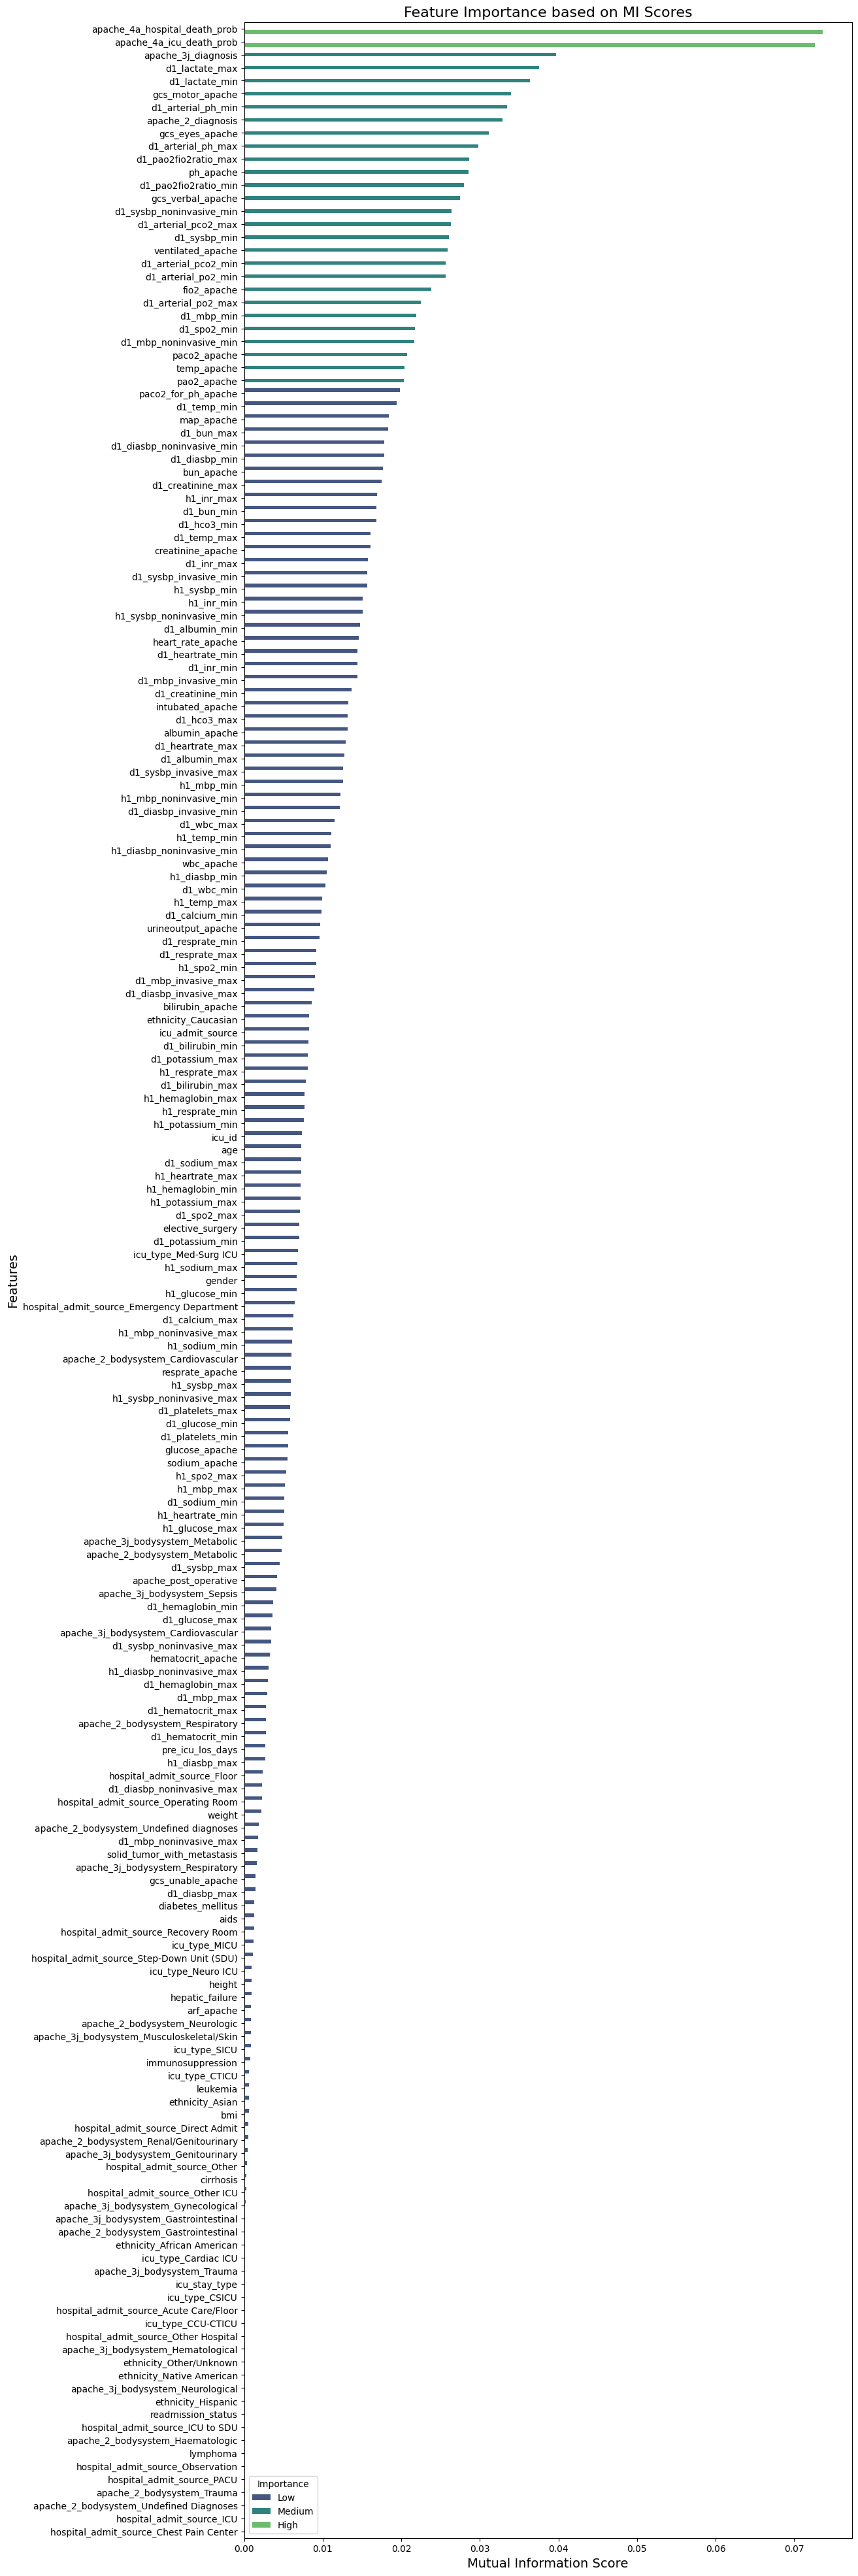

In [43]:
# Categorize MI_Score into ranges
bins = [0, 0.02, 0.05,0.1]
labels = ['Low', 'Medium', 'High']
MIScores['Importance'] = pd.cut(MIScores['MI Score'], bins=bins, labels=labels)
MIScores = MIScores.sort_values(by='MI Score', ascending=False)

plt.figure(figsize=(12, 50))
sns.barplot(x='MI Score', y='Feature', data=MIScores, hue='Importance', palette='viridis')
plt.title('Feature Importance based on MI Scores', fontsize=16)
plt.xlabel('Mutual Information Score', fontsize=14)
plt.ylabel('Features', fontsize=14)

plt.show()


In [44]:
MIScores.shape

(193, 3)

**Observation:**

By observation, MI scores of 0.01 should be kept
and all features with MI scores under 0.01 will be dropped off




In [45]:
low_threshold = 0.01

features_to_keep = MIScores[(MIScores['MI Score'] >= low_threshold)]['Feature']
features_to_drop = MIScores[MIScores['MI Score'] < low_threshold]['Feature']

print(f"Features to keep:\n{features_to_keep.tolist()}\nHow many features? {len(features_to_keep.tolist())}\n")
print(f"Features to drop:\n{features_to_drop.tolist()}\nHow many features? {len(features_to_drop.tolist())}\n")

print("Check Sum :")
print(len(features_to_keep.tolist()) + len(features_to_drop.tolist()) == len(MIScores['Feature'].tolist()))

# now data includes only the choosen features to continue
Xtrain = dtrain[features_to_keep]
Xtest = dtest[features_to_keep]


Features to keep:
['apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'apache_3j_diagnosis', 'd1_lactate_max', 'd1_lactate_min', 'gcs_motor_apache', 'd1_arterial_ph_min', 'apache_2_diagnosis', 'gcs_eyes_apache', 'd1_arterial_ph_max', 'd1_pao2fio2ratio_max', 'ph_apache', 'd1_pao2fio2ratio_min', 'gcs_verbal_apache', 'd1_sysbp_noninvasive_min', 'd1_arterial_pco2_max', 'd1_sysbp_min', 'ventilated_apache', 'd1_arterial_pco2_min', 'd1_arterial_po2_min', 'fio2_apache', 'd1_arterial_po2_max', 'd1_mbp_min', 'd1_spo2_min', 'd1_mbp_noninvasive_min', 'paco2_apache', 'temp_apache', 'pao2_apache', 'paco2_for_ph_apache', 'd1_temp_min', 'map_apache', 'd1_bun_max', 'd1_diasbp_noninvasive_min', 'd1_diasbp_min', 'bun_apache', 'd1_creatinine_max', 'h1_inr_max', 'd1_bun_min', 'd1_hco3_min', 'd1_temp_max', 'creatinine_apache', 'd1_inr_max', 'd1_sysbp_invasive_min', 'h1_sysbp_min', 'h1_inr_min', 'h1_sysbp_noninvasive_min', 'd1_albumin_min', 'heart_rate_apache', 'd1_heartrate_min', 'd1_inr_min', 'd1

In [46]:
print(Xtrain.shape)
print(Xtest.shape)

Ytrain=ytrain
Ytest=ytest

print(Ytrain.shape)
print(Ytest.shape)

(91713, 67)
(39308, 67)
(91713,)
(39308,)


# 4. EDA (Exploratory Data Analysis)

In this section we will investigate the importance of features that got the highest mi score means have a great impact on target
lets take 10 features with the highest mi score and make plots of them,  

In [47]:
Original_dtrain = data_train.copy(deep=True)
Original_dtrain.describe()

encounter_id     patient_id   hospital_id  hospital_death  \
count   91713.000000   91713.000000  91713.000000    91713.000000   
mean    65606.079280   65537.131464    105.669262        0.086302   
std     37795.088538   37811.252183     62.854406        0.280811   
min         1.000000       1.000000      2.000000        0.000000   
25%     32852.000000   32830.000000     47.000000        0.000000   
50%     65665.000000   65413.000000    109.000000        0.000000   
75%     98342.000000   98298.000000    161.000000        0.000000   
max    131051.000000  131051.000000    204.000000        1.000000   

                age           bmi  elective_surgery        height  \
count  87485.000000  88284.000000      91713.000000  90379.000000   
mean      62.309516     29.185818          0.183736    169.641588   
std       16.775119      8.275142          0.387271     10.795378   
min       16.000000     14.844926          0.000000    137.200000   
25%       52.000000     23.641975          0.000000    162.500000   
50%       65.000000     27.654655          0.000000    170.100000   
75%       75.000000     32.930206          0.000000    177.800000   
max       89.000000     67.814990          1.000000    195.590000   

             icu_id  pre_icu_los_days  ...  apache_4a_hospital_death_prob  \
count  91713.000000      91713.000000  ...                   83766.000000   
mean     508.357692          0.835766  ...                       0.086787   
std      228.989661          2.487756  ...                       0.247569   
min       82.000000        -24.947222  ...                      -1.000000   
25%      369.000000          0.035417  ...                       0.020000   
50%      504.000000          0.138889  ...                       0.050000   
75%      679.000000          0.409028  ...                       0.130000   
max      927.000000        159.090972  ...                       0.990000   

       apache_4a_icu_death_prob          aids     cirrhosis  \
count              83766.000000  90998.000000  90998.000000   
mean                   0.043955      0.000857      0.015693   
std                    0.217341      0.029265      0.124284   
min                   -1.000000      0.000000      0.000000   
25%                    0.010000      0.000000      0.000000   
50%                    0.020000      0.000000      0.000000   
75%                    0.060000      0.000000      0.000000   
max                    0.970000      1.000000      1.000000   

       diabetes_mellitus  hepatic_failure  immunosuppression      leukemia  \
count       90998.000000     90998.000000       90998.000000  90998.000000   
mean            0.225192         0.012989           0.026165      0.007066   
std             0.417711         0.113229           0.159628      0.083763   
min             0.000000         0.000000           0.000000      0.000000   
25%             0.000000         0.000000           0.000000      0.000000   
50%             0.000000         0.000000           0.000000      0.000000   
75%             0.000000         0.000000           0.000000      0.000000   
max             1.000000         1.000000           1.000000      1.000000   

           lymphoma  solid_tumor_with_metastasis  
count  90998.000000                 90998.000000  
mean       0.004132                     0.020638  
std        0.064148                     0.142169  
min        0.000000                     0.000000  
25%        0.000000                     0.000000  
50%        0.000000                     0.000000  
75%        0.000000                     0.000000  
max        1.000000                     1.000000  

[8 rows x 178 columns]

In [48]:
# taking top 10 features according to mutual information(had been performed in furture)
TopFeatures = MIScores['Feature'].head(10)
print(TopFeatures)

133    apache_4a_hospital_death_prob
134         apache_4a_icu_death_prob
13               apache_3j_diagnosis
105                   d1_lactate_max
106                   d1_lactate_min
21                  gcs_motor_apache
128               d1_arterial_ph_min
12                apache_2_diagnosis
20                   gcs_eyes_apache
127               d1_arterial_ph_max
Name: Feature, dtype: object


In [49]:
# look for the features in the data set

Original_dtrain = data_train.copy(deep=True)
columns_to_check = list(TopFeatures)

# Check if each feature is in the Data set
missing_columns = [col for col in columns_to_check if col not in data_train.columns]

if not missing_columns:
    print("All specified columns are present in the DataFrame.")
else:
    print("The following columns are missing:")
    print(missing_columns)


All specified columns are present in the DataFrame.


In [50]:
# Features data type
import pandas as pd

# Create a list to store the column names and their data types
column_data_types = []

# Iterate over the columns to check
for column in columns_to_check:
    if column in data_train.columns:
        # Get the data type of the column
        dtype = data_train[column].dtype
        column_data_types.append({'Column': column, 'Data Type': dtype})
    else:
        column_data_types.append({'Column': column, 'Data Type': 'Not Present'})

# Convert the list to a DataFrame
data_types_df = pd.DataFrame(column_data_types)

# Display the DataFrame
data_types_df


Column Data Type
0  apache_4a_hospital_death_prob   float64
1       apache_4a_icu_death_prob   float64
2            apache_3j_diagnosis   float64
3                 d1_lactate_max   float64
4                 d1_lactate_min   float64
5               gcs_motor_apache   float64
6             d1_arterial_ph_min   float64
7             apache_2_diagnosis   float64
8                gcs_eyes_apache   float64
9             d1_arterial_ph_max   float64

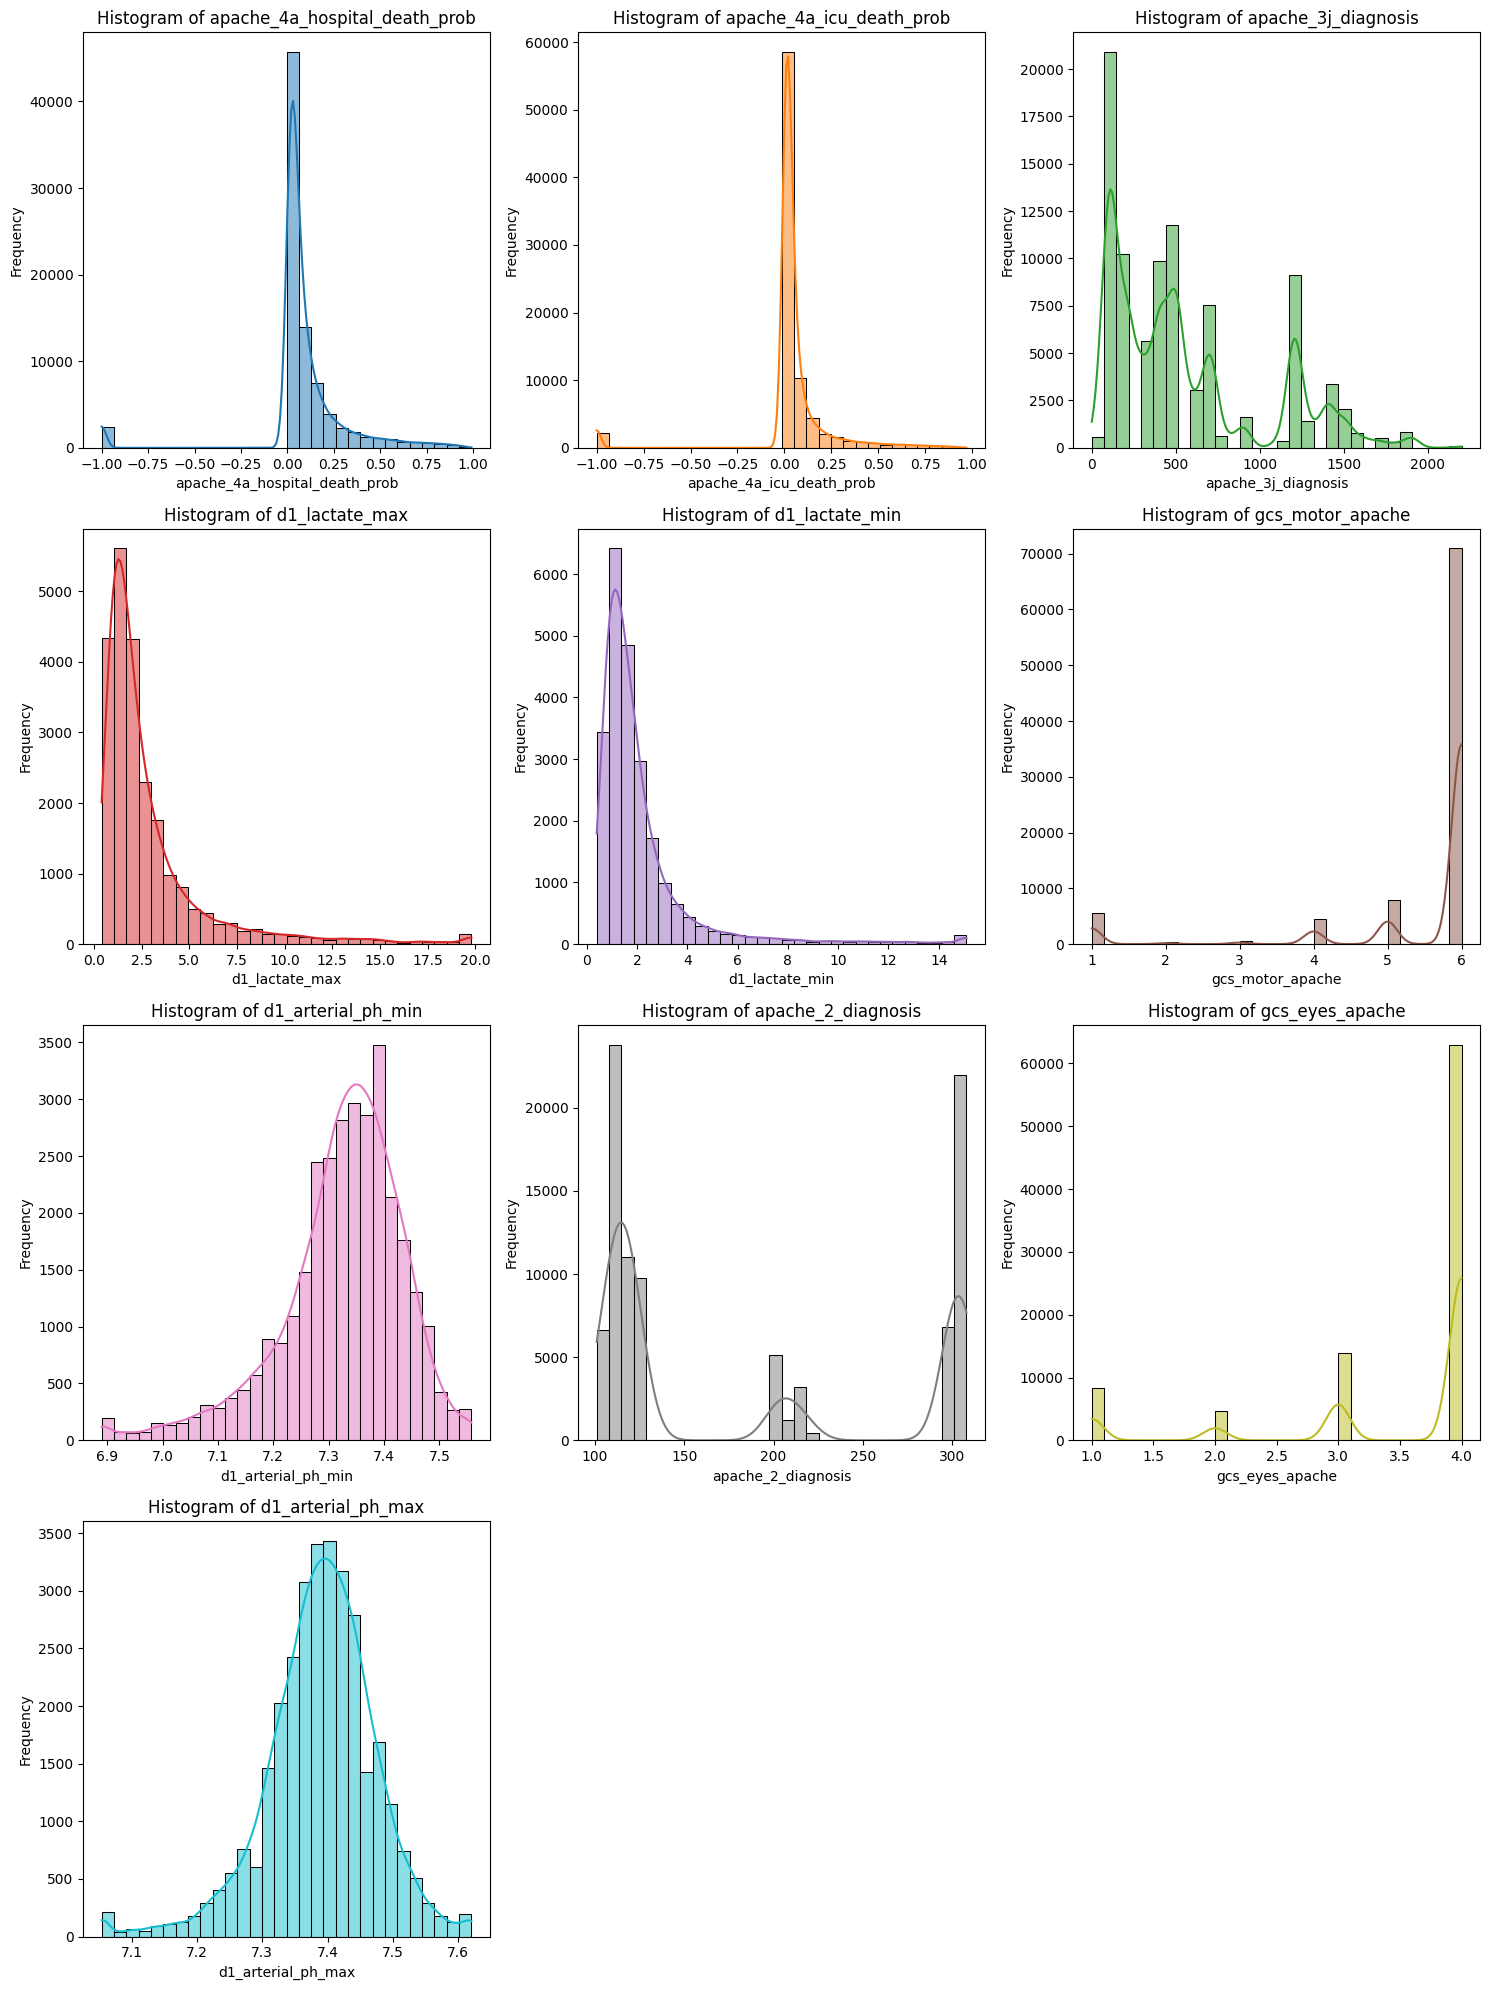

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(df, features):
    # Define a color palette
    colors = sns.color_palette("tab10", len(features))

    # Determine the number of rows and columns for the grid layout
    num_features = len(features)
    num_cols = 3  # Number of columns in the grid
    num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows needed

    # Create a figure with subplots
    plt.figure(figsize=(15, 5 * num_rows))

    for i, feature in enumerate(features):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.histplot(df[feature], bins=30, kde=True, color=colors[i])
        plt.title(f'Histogram of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

plot_histograms(data_train, columns_to_check )


# 5. Models Deployment

* 5.1 Start Simple: Train a Baseline Model Without Any Tuning.
* 5.2 Use Hyperparameter Search with Cross-Validation.
* 5.3 Choose best Models for getting final results.
* 5.4 Final results.





# 5.1 Start Simple: Train a Baseline Model Without Any Tuning.

**Procedure:**
  * 5.1.1 10-Fold Cross-Validation: Split  dataset into 10 folds
  * 5.1.2 Perform Cross-Validation:Train model on the training folds(balancing each fold) and evaluate it on the test fold.
  * 5.1.3 Calculate performance metrics such as accuracy, precision, recall, for each fold.
  * 5.1.4 Average Results: After running cross-validation, calculate average  performance metrics across all folds.
  -------------------------------------------------------------------------
  **Summary**
  * Summary results for algorithems with default hyperparamters
  -------------------------------------------------------------------------

5.1 Start Simple: Train a Baseline Model Without Any Tuning.Get understanding of model and data perfoermance with learning curve.

Cross-validation fold results:
             Fold 1    Fold 2    Fold 3    Fold 4    Fold 5    Fold 6  \
Accuracy   0.803053  0.796238  0.796102  0.809050  0.793376  0.799782   
Precision  0.267541  0.254415  0.258687  0.290212  0.250836  0.274157   
Recall     0.744444  0.761983  0.755233  0.758982  0.723473  0.733835   
F1-Score   0.393621  0.381465  0.385374  0.419876  0.372517  0.399182   

             Fold 7    Fold 8    Fold 9   Fold 10  
Accuracy   0.802099  0.797465  0.794466  0.795966  
Precision  0.270193  0.263682  0.252637  0.263043  
Recall     0.737578  0.755943  0.737439  0.774400  
F1-Score   0.395504  0.390984  0.376344  0.392698  

Mean results across folds:
                    Accuracy  Precision    Recall  F1-Score
LogisticRegression   0.79876    0.26454  0.748331  0.390756

Final test set results:
                    Accuracy  Precision   Recall  F1-Score
LogisticRegression  0.925585   0.681373  0.26276  0.379263


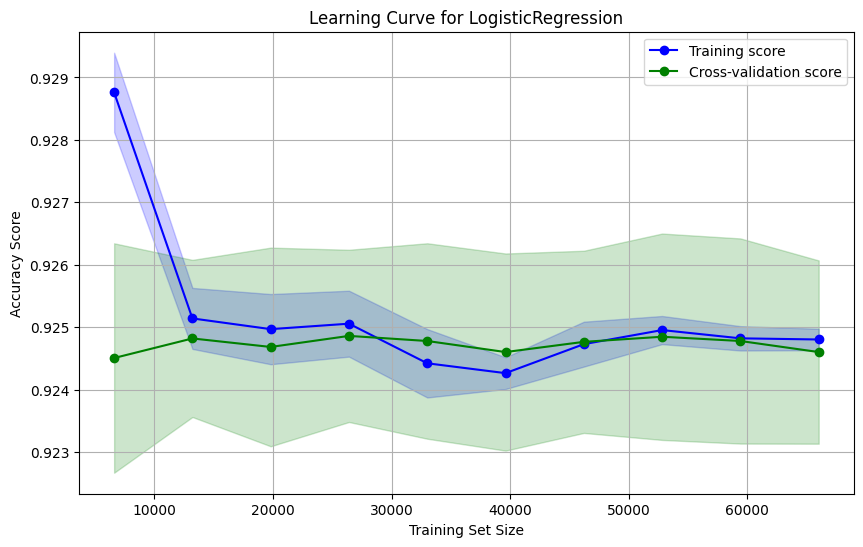

In [ ]:
from sklearn.model_selection import train_test_split, KFold, learning_curve
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score , f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

class ModelEvaluator:
    def __init__(self, model, Xtrain, Ytrain, pca_components=0.95, n_splits=10):
        self.model = model
        self.Xtrain = np.array(Xtrain)
        self.Ytrain = np.array(Ytrain)
        self.pca_components = pca_components
        self.n_splits = n_splits
        self.scaler = StandardScaler()  # Initialize the scaler
        self.pca = PCA(n_components=self.pca_components)  # Initialize PCA

        # Split into training (80%) and testing (20%) sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.Xtrain, self.Ytrain, test_size=0.2, random_state=42
        )

    def cross_val_fold(self, train_index, valid_index):
        X_train_fold, X_valid_fold = self.X_train[train_index], self.X_train[valid_index]
        y_train_fold, y_valid_fold = self.y_train[train_index], self.y_train[valid_index]

        # Normalizing the data
        X_train_fold = self.scaler.fit_transform(X_train_fold)
        X_valid_fold = self.scaler.transform(X_valid_fold)

        # Apply PCA
        X_train_fold = self.pca.fit_transform(X_train_fold)
        X_valid_fold = self.pca.transform(X_valid_fold)

        # Balancing the training set only
        smote = SMOTE(random_state=42)
        X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

        # Fitting the model and predicting
        self.model.fit(X_train_fold_resampled, y_train_fold_resampled)
        y_valid_pred = self.model.predict(X_valid_fold)

        # Evaluating performance
        fold_accuracy = accuracy_score(y_valid_fold, y_valid_pred)
        fold_precision = precision_score(y_valid_fold, y_valid_pred)
        fold_recall = recall_score(y_valid_fold, y_valid_pred)
        fold_f1 = f1_score(y_valid_fold, y_valid_pred)

        return fold_accuracy, fold_precision, fold_recall, fold_f1

    def evaluate_model(self):
        kf = KFold(n_splits=self.n_splits, shuffle=True, random_state=42)

        # Perform cross-validation
        results = [
            self.cross_val_fold(train_index, valid_index)
            for train_index, valid_index in kf.split(self.X_train)
        ]

        accuracies, precisions, recalls, f1_scores = zip(*results)

        average_accuracy = np.mean(accuracies)
        average_precision = np.mean(precisions)
        average_recall = np.mean(recalls)
        average_f1 = np.mean(f1_scores)

        # Normalize and apply PCA to the entire training and testing sets
        X_train_normalized = self.scaler.fit_transform(self.X_train)
        X_train_pca = self.pca.fit_transform(X_train_normalized)
        X_test_normalized = self.scaler.transform(self.X_test)
        X_test_pca = self.pca.transform(X_test_normalized)

        # Train the model on the full training set and evaluate on the test set
        self.model.fit(X_train_pca, self.y_train)
        y_test_pred = self.model.predict(X_test_pca)

        # Evaluate the final model on the test set
        test_accuracy = accuracy_score(self.y_test, y_test_pred)
        test_precision = precision_score(self.y_test, y_test_pred)
        test_recall = recall_score(self.y_test, y_test_pred)
        test_f1 = f1_score(self.y_test, y_test_pred)

        # Create data frames for documentation
        fold_results_df = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                       columns=[f'Fold {i}' for i in range(1, self.n_splits + 1)],
                                       data=[accuracies, precisions, recalls, f1_scores])

        mean_results_df = pd.DataFrame(index=[self.model.__class__.__name__],
                                       columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                       data=[[average_accuracy, average_precision, average_recall, average_f1]])

        final_results_df = pd.DataFrame(index=[self.model.__class__.__name__],
                                        columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                        data=[[test_accuracy, test_precision, test_recall, test_f1]])

        return fold_results_df, mean_results_df, final_results_df

    #def plot_learning_curve(self):
        # Normalize and apply PCA to the entire training set
        #X_train_normalized = self.scaler.fit_transform(self.X_train)
        #X_train_pca = self.pca.fit_transform(X_train_normalized)

        # Generate the learning curve data
        #train_sizes, train_scores, valid_scores = learning_curve(
            #self.model, X_train_pca, self.y_train, cv=self.n_splits, scoring='accuracy',
            #n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
        #)

        # Calculate mean and standard deviation of train and validation scores
        #train_mean = np.mean(train_scores, axis=1)
        #train_std = np.std(train_scores, axis=1)
        #valid_mean = np.mean(valid_scores, axis=1)
        #valid_std = np.std(valid_scores, axis=1)

        # Plot the learning curve
        #plt.figure(figsize=(10, 6))
        #plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
        #plt.plot(train_sizes, valid_mean, 'o-', color='green', label='Cross-validation score')
        #plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
        #plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color='green', alpha=0.2)
        #plt.title(f'Learning Curve for {self.model.__class__.__name__}')
        #plt.xlabel('Training Set Size')
        #plt.ylabel('Accuracy Score')
        #plt.legend(loc='best')
        #plt.grid()
        ##plt.show()

# Example usage with Logistic Regression
from sklearn.linear_model import LogisticRegression

# Assuming Xtrain and Ytrain are defined earlier in your code
evaluator = ModelEvaluator(LogisticRegression(), Xtrain, Ytrain)
fold_results_df, mean_results_df, final_results_df = evaluator.evaluate_model()

# Output results
print("Cross-validation fold results:")
print(fold_results_df)
print("\nMean results across folds:")
print(mean_results_df)
print("\nFinal test set results:")
print(final_results_df)

# Plot the learning curve
#evaluator.plot_learning_curve()






Cross-validation fold results:
             Fold 1    Fold 2    Fold 3    Fold 4    Fold 5    Fold 6  \
Accuracy   0.790514  0.793649  0.797056  0.800327  0.786289  0.786698   
Precision  0.232764  0.236522  0.243802  0.262939  0.221108  0.237456   
Recall     0.626984  0.674380  0.665056  0.661677  0.602894  0.612030   
F1-Score   0.339493  0.350215  0.356803  0.376330  0.323555  0.342161   

             Fold 7    Fold 8    Fold 9   Fold 10  
Accuracy   0.792558  0.788197  0.788606  0.788742  
Precision  0.243275  0.235227  0.227855  0.233122  
Recall     0.645963  0.649762  0.633712  0.646400  
F1-Score   0.353441  0.345409  0.335191  0.342663  

Mean results across folds:
                      Accuracy  Precision    Recall  F1-Score
KNeighborsClassifier  0.791263   0.237407  0.641886  0.346526

Final test set results:
                      Accuracy  Precision    Recall  F1-Score
KNeighborsClassifier  0.925149   0.708984  0.228733  0.345879


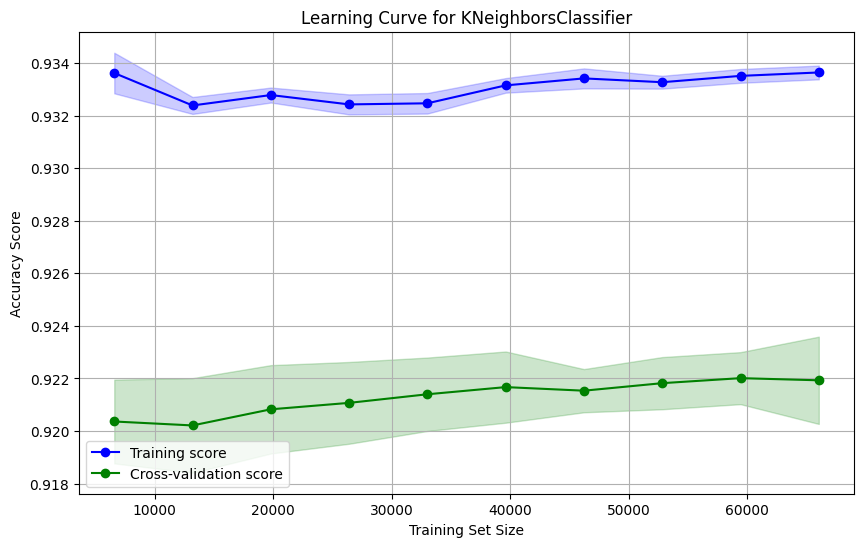

In [ ]:
from sklearn.model_selection import train_test_split, KFold, learning_curve
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score , f1_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

class ModelEvaluator:
    def __init__(self, model, Xtrain, Ytrain, pca_components=0.95, n_splits=10):
        self.model = model
        self.Xtrain = np.array(Xtrain)
        self.Ytrain = np.array(Ytrain)
        self.pca_components = pca_components
        self.n_splits = n_splits
        self.scaler = StandardScaler()  # Initialize the scaler
        self.pca = PCA(n_components=self.pca_components)  # Initialize PCA

        # Split into training (80%) and testing (20%) sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.Xtrain, self.Ytrain, test_size=0.2, random_state=42
        )

    def cross_val_fold(self, train_index, valid_index):
        X_train_fold, X_valid_fold = self.X_train[train_index], self.X_train[valid_index]
        y_train_fold, y_valid_fold = self.y_train[train_index], self.y_train[valid_index]

        # Normalizing the data
        X_train_fold = self.scaler.fit_transform(X_train_fold)
        X_valid_fold = self.scaler.transform(X_valid_fold)

        # Apply PCA
        X_train_fold = self.pca.fit_transform(X_train_fold)
        X_valid_fold = self.pca.transform(X_valid_fold)

        # Balancing the training set only
        smote = SMOTE(random_state=42)
        X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

        # Fitting the model and predicting
        self.model.fit(X_train_fold_resampled, y_train_fold_resampled)
        y_valid_pred = self.model.predict(X_valid_fold)

        # Evaluating performance
        fold_accuracy = accuracy_score(y_valid_fold, y_valid_pred)
        fold_precision = precision_score(y_valid_fold, y_valid_pred)
        fold_recall = recall_score(y_valid_fold, y_valid_pred)
        fold_f1 = f1_score(y_valid_fold, y_valid_pred)

        return fold_accuracy, fold_precision, fold_recall, fold_f1

    def evaluate_model(self):
        kf = KFold(n_splits=self.n_splits, shuffle=True, random_state=42)

        # Perform cross-validation
        results = [
            self.cross_val_fold(train_index, valid_index)
            for train_index, valid_index in kf.split(self.X_train)
        ]

        accuracies, precisions, recalls, f1_scores = zip(*results)

        average_accuracy = np.mean(accuracies)
        average_precision = np.mean(precisions)
        average_recall = np.mean(recalls)
        average_f1 = np.mean(f1_scores)

        # Normalize and apply PCA to the entire training and testing sets
        X_train_normalized = self.scaler.fit_transform(self.X_train)
        X_train_pca = self.pca.fit_transform(X_train_normalized)
        X_test_normalized = self.scaler.transform(self.X_test)
        X_test_pca = self.pca.transform(X_test_normalized)

        # Train the model on the full training set and evaluate on the test set
        self.model.fit(X_train_pca, self.y_train)
        y_test_pred = self.model.predict(X_test_pca)

        # Evaluate the final model on the test set
        test_accuracy = accuracy_score(self.y_test, y_test_pred)
        test_precision = precision_score(self.y_test, y_test_pred)
        test_recall = recall_score(self.y_test, y_test_pred)
        test_f1 = f1_score(self.y_test, y_test_pred)

        # Create data frames for documentation
        fold_results_df = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                       columns=[f'Fold {i}' for i in range(1, self.n_splits + 1)],
                                       data=[accuracies, precisions, recalls, f1_scores])

        mean_results_df = pd.DataFrame(index=[self.model.__class__.__name__],
                                       columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                       data=[[average_accuracy, average_precision, average_recall, average_f1]])

        final_results_df = pd.DataFrame(index=[self.model.__class__.__name__],
                                        columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                        data=[[test_accuracy, test_precision, test_recall, test_f1]])

        return fold_results_df, mean_results_df, final_results_df

    """def plot_learning_curve(self):
        # Normalize and apply PCA to the entire training set
        X_train_normalized = self.scaler.fit_transform(self.X_train)
        X_train_pca = self.pca.fit_transform(X_train_normalized)

        # Generate the learning curve data
        train_sizes, train_scores, valid_scores = learning_curve(
            self.model, X_train_pca, self.y_train, cv=self.n_splits, scoring='accuracy',
            n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
        )

        # Calculate mean and standard deviation of train and validation scores
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        valid_mean = np.mean(valid_scores, axis=1)
        valid_std = np.std(valid_scores, axis=1)

        # Plot the learning curve
        plt.figure(figsize=(10, 6))
        plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
        plt.plot(train_sizes, valid_mean, 'o-', color='green', label='Cross-validation score')
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
        plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color='green', alpha=0.2)
        plt.title(f'Learning Curve for {self.model.__class__.__name__}')
        plt.xlabel('Training Set Size')
        plt.ylabel('Accuracy Score')
        plt.legend(loc='best')
        plt.grid()
        plt.show()
        """
# Example usage with KNN
from sklearn.neighbors import KNeighborsClassifier

# Assuming Xtrain and Ytrain are defined earlier in your code
evaluator = ModelEvaluator(KNeighborsClassifier(), Xtrain, Ytrain)
fold_results_df, mean_results_df, final_results_df = evaluator.evaluate_model()

# Output results
print("Cross-validation fold results:")
print(fold_results_df)
print("\nMean results across folds:")
print(mean_results_df)
print("\nFinal test set results:")
print(final_results_df)

# Plot the learning curve
#evaluator.plot_learning_curve()


In [ ]:
from sklearn.model_selection import train_test_split, KFold, learning_curve
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

class ModelEvaluator:
    def __init__(self, model, Xtrain, Ytrain, pca_components=0.95, n_splits=10):
        self.model = model
        self.Xtrain = np.array(Xtrain)
        self.Ytrain = np.array(Ytrain)
        self.pca_components = pca_components
        self.n_splits = n_splits
        self.scaler = StandardScaler()  # Initialize the scaler
        self.pca = PCA(n_components=self.pca_components)  # Initialize PCA

        # Split into training (80%) and testing (20%) sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.Xtrain, self.Ytrain, test_size=0.2, random_state=42
        )

    def cross_val_fold(self, train_index, valid_index):
        X_train_fold, X_valid_fold = self.X_train[train_index], self.X_train[valid_index]
        y_train_fold, y_valid_fold = self.y_train[train_index], self.y_train[valid_index]

        # Normalizing the data
        X_train_fold = self.scaler.fit_transform(X_train_fold)
        X_valid_fold = self.scaler.transform(X_valid_fold)

        # Apply PCA
        X_train_fold = self.pca.fit_transform(X_train_fold)
        X_valid_fold = self.pca.transform(X_valid_fold)

        # Balancing the training set only
        smote = SMOTE(random_state=42)
        X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

        # Fitting the model and predicting
        self.model.fit(X_train_fold_resampled, y_train_fold_resampled)
        y_valid_pred = self.model.predict(X_valid_fold)

        # Evaluating performance
        fold_accuracy = accuracy_score(y_valid_fold, y_valid_pred)
        fold_precision = precision_score(y_valid_fold, y_valid_pred)
        fold_recall = recall_score(y_valid_fold, y_valid_pred)
        fold_f1 = f1_score(y_valid_fold, y_valid_pred)

        return fold_accuracy, fold_precision, fold_recall, fold_f1

    def evaluate_model(self):
        kf = KFold(n_splits=self.n_splits, shuffle=True, random_state=42)

        # Perform cross-validation
        results = [
            self.cross_val_fold(train_index, valid_index)
            for train_index, valid_index in kf.split(self.X_train)
        ]

        accuracies, precisions, recalls, f1_scores = zip(*results)

        average_accuracy = np.mean(accuracies)
        average_precision = np.mean(precisions)
        average_recall = np.mean(recalls)
        average_f1 = np.mean(f1_scores)

        # Normalize and apply PCA to the entire training and testing sets
        X_train_normalized = self.scaler.fit_transform(self.X_train)
        X_train_pca = self.pca.fit_transform(X_train_normalized)
        X_test_normalized = self.scaler.transform(self.X_test)
        X_test_pca = self.pca.transform(X_test_normalized)

        # Train the model on the full training set and evaluate on the test set
        self.model.fit(X_train_pca, self.y_train)
        y_test_pred = self.model.predict(X_test_pca)

        # Evaluate the final model on the test set
        test_accuracy = accuracy_score(self.y_test, y_test_pred)
        test_precision = precision_score(self.y_test, y_test_pred)
        test_recall = recall_score(self.y_test, y_test_pred)
        test_f1 = f1_score(self.y_test, y_test_pred)

        # Create data frames for documentation
        fold_results_df = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                       columns=[f'Fold {i}' for i in range(1, self.n_splits + 1)],
                                       data=[accuracies, precisions, recalls, f1_scores])

        mean_results_df = pd.DataFrame(index=[self.model.__class__.__name__],
                                       columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                       data=[[average_accuracy, average_precision, average_recall, average_f1]])

        final_results_df = pd.DataFrame(index=[self.model.__class__.__name__],
                                        columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                        data=[[test_accuracy, test_precision, test_recall, test_f1]])

        return fold_results_df, mean_results_df, final_results_df

    """def plot_learning_curve(self):
        # Normalize and apply PCA to the entire training set
        X_train_normalized = self.scaler.fit_transform(self.X_train)
        X_train_pca = self.pca.fit_transform(X_train_normalized)

        # Generate the learning curve data
        train_sizes, train_scores, valid_scores = learning_curve(
            self.model, X_train_pca, self.y_train, cv=self.n_splits, scoring='accuracy',
            n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
        )

        # Calculate mean and standard deviation of train and validation scores
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        valid_mean = np.mean(valid_scores, axis=1)
        valid_std = np.std(valid_scores, axis=1)

        # Plot the learning curve
        plt.figure(figsize=(10, 6))
        plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
        plt.plot(train_sizes, valid_mean, 'o-', color='green', label='Cross-validation score')
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
        plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color='green', alpha=0.2)
        plt.title(f'Learning Curve for {self.model.__class__.__name__}')
        plt.xlabel('Training Set Size')
        plt.ylabel('Accuracy Score')
        plt.legend(loc='best')
        plt.grid()
        plt.show()
"""
# Example usage with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Assuming Xtrain and Ytrain are defined earlier in your code
evaluator = ModelEvaluator(RandomForestClassifier(), Xtrain, Ytrain)
fold_results_df, mean_results_df, final_results_df = evaluator.evaluate_model()

# Output results
print("Cross-validation fold results:")
print(fold_results_df)
print("\nMean results across folds:")
print(mean_results_df)
print("\nFinal test set results:")
print(final_results_df)

# Plot the learning curve
#evaluator.plot_learning_curve()


Cross-validation fold results:
             Fold 1    Fold 2    Fold 3    Fold 4    Fold 5    Fold 6  \
Accuracy   0.893417  0.900913  0.900232  0.899687  0.893962  0.895734   
Precision  0.402813  0.418667  0.423237  0.455263  0.396277  0.435567   
Recall     0.500000  0.519008  0.492754  0.517964  0.479100  0.508271   
F1-Score   0.446176  0.463469  0.455357  0.484594  0.433770  0.469119   

             Fold 7    Fold 8    Fold 9   Fold 10  
Accuracy   0.897642  0.898732  0.889055  0.897233  
Precision  0.428762  0.426702  0.375158  0.413885  
Recall     0.500000  0.516640  0.479741  0.496000  
F1-Score   0.461649  0.467384  0.421053  0.451237  

Mean results across folds:
                        Accuracy  Precision    Recall  F1-Score
RandomForestClassifier  0.896661   0.417633  0.500948  0.455381

Final test set results:
                        Accuracy  Precision    Recall  F1-Score
RandomForestClassifier  0.928311   0.758555  0.251418  0.377662


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, KFold, learning_curve
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

class ModelEvaluator:
    def __init__(self, model, Xtrain, Ytrain, pca_components=0.95, n_splits=10):
        self.model = model
        self.Xtrain = np.array(Xtrain)
        self.Ytrain = np.array(Ytrain)
        self.pca_components = pca_components
        self.n_splits = n_splits
        self.scaler = StandardScaler()  # Initialize the scaler
        self.pca = PCA(n_components=self.pca_components)  # Initialize PCA

        # Split into training (80%) and testing (20%) sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.Xtrain, self.Ytrain, test_size=0.2, random_state=42
        )

    def cross_val_fold(self, train_index, valid_index):
        X_train_fold, X_valid_fold = self.X_train[train_index], self.X_train[valid_index]
        y_train_fold, y_valid_fold = self.y_train[train_index], self.y_train[valid_index]

        # Normalizing the data
        X_train_fold = self.scaler.fit_transform(X_train_fold)
        X_valid_fold = self.scaler.transform(X_valid_fold)

        # Apply PCA
        X_train_fold = self.pca.fit_transform(X_train_fold)
        X_valid_fold = self.pca.transform(X_valid_fold)

        # Balancing the training set only
        smote = SMOTE(random_state=42)
        X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

        # Fitting the model and predicting
        self.model.fit(X_train_fold_resampled, y_train_fold_resampled)
        y_valid_pred = self.model.predict(X_valid_fold)

        # Evaluating performance
        fold_accuracy = accuracy_score(y_valid_fold, y_valid_pred)
        fold_precision = precision_score(y_valid_fold, y_valid_pred)
        fold_recall = recall_score(y_valid_fold, y_valid_pred)
        fold_f1 = f1_score(y_valid_fold, y_valid_pred)

        return fold_accuracy, fold_precision, fold_recall, fold_f1

    def evaluate_model(self):
        kf = KFold(n_splits=self.n_splits, shuffle=True, random_state=42)

        # Perform cross-validation
        results = [
            self.cross_val_fold(train_index, valid_index)
            for train_index, valid_index in kf.split(self.X_train)
        ]

        accuracies, precisions, recalls, f1_scores = zip(*results)

        average_accuracy = np.mean(accuracies)
        average_precision = np.mean(precisions)
        average_recall = np.mean(recalls)
        average_f1 = np.mean(f1_scores)

        # Normalize and apply PCA to the entire training and testing sets
        X_train_normalized = self.scaler.fit_transform(self.X_train)
        X_train_pca = self.pca.fit_transform(X_train_normalized)
        X_test_normalized = self.scaler.transform(self.X_test)
        X_test_pca = self.pca.transform(X_test_normalized)

        # Train the model on the full training set and evaluate on the test set
        self.model.fit(X_train_pca, self.y_train)
        y_test_pred = self.model.predict(X_test_pca)

        # Evaluate the final model on the test set
        test_accuracy = accuracy_score(self.y_test, y_test_pred)
        test_precision = precision_score(self.y_test, y_test_pred)
        test_recall = recall_score(self.y_test, y_test_pred)
        test_f1 = f1_score(self.y_test, y_test_pred)

        # Create data frames for documentation
        fold_results_df = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                       columns=[f'Fold {i}' for i in range(1, self.n_splits + 1)],
                                       data=[accuracies, precisions, recalls, f1_scores])

        mean_results_df = pd.DataFrame(index=[self.model.__class__.__name__],
                                       columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                       data=[[average_accuracy, average_precision, average_recall, average_f1]])

        final_results_df = pd.DataFrame(index=[self.model.__class__.__name__],
                                        columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                        data=[[test_accuracy, test_precision, test_recall, test_f1]])

        return fold_results_df, mean_results_df, final_results_df

    """def plot_learning_curve(self):
        # Normalize and apply PCA to the entire training set
        X_train_normalized = self.scaler.fit_transform(self.X_train)
        X_train_pca = self.pca.fit_transform(X_train_normalized)

        # Generate the learning curve data
        train_sizes, train_scores, valid_scores = learning_curve(
            self.model, X_train_pca, self.y_train, cv=self.n_splits, scoring='accuracy',
            n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
        )

        # Calculate mean and standard deviation of train and validation scores
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        valid_mean = np.mean(valid_scores, axis=1)
        valid_std = np.std(valid_scores, axis=1)

        # Plot the learning curve
        plt.figure(figsize=(10, 6))
        plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
        plt.plot(train_sizes, valid_mean, 'o-', color='green', label='Cross-validation score')
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
        plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color='green', alpha=0.2)
        plt.title(f'Learning Curve for {self.model.__class__.__name__}')
        plt.xlabel('Training Set Size')
        plt.ylabel('Accuracy Score')
        plt.legend(loc='best')
        plt.grid()
        plt.show()
"""
# Example usage with AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Assuming Xtrain and Ytrain are defined earlier in your code
evaluator = ModelEvaluator(AdaBoostClassifier(), Xtrain, Ytrain)
fold_results_df, mean_results_df, final_results_df = evaluator.evaluate_model()

# Output results
print("Cross-validation fold results:")
print(fold_results_df)
print("\nMean results across folds:")
print(mean_results_df)
print("\nFinal test set results:")
print(final_results_df)

# Plot the learning curve
#evaluator.plot_learning_curve()


Cross-validation fold results:
             Fold 1    Fold 2    Fold 3    Fold 4    Fold 5    Fold 6  \
Accuracy   0.800872  0.803326  0.802644  0.800600  0.792149  0.792149   
Precision  0.252826  0.256112  0.257193  0.276056  0.243028  0.258698   
Recall     0.674603  0.727273  0.705314  0.733533  0.686495  0.693233   
F1-Score   0.367806  0.378820  0.376936  0.401146  0.358974  0.376788   

             Fold 7    Fold 8    Fold 9   Fold 10  
Accuracy   0.797056  0.801281  0.792967  0.794466  
Precision  0.255072  0.263037  0.243750  0.255130  
Recall     0.683230  0.727417  0.695300  0.736000  
F1-Score   0.371465  0.386364  0.360959  0.378913  

Mean results across folds:
                    Accuracy  Precision   Recall  F1-Score
AdaBoostClassifier  0.797751    0.25609  0.70624  0.375817

Final test set results:
                    Accuracy  Precision    Recall  F1-Score
AdaBoostClassifier  0.923568   0.620915  0.299307  0.403912


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split, KFold, learning_curve
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class ModelEvaluator:
    def __init__(self, model, Xtrain, Ytrain, pca_components=0.95, n_splits=10):
        self.model = model
        self.Xtrain = np.array(Xtrain)
        self.Ytrain = np.array(Ytrain)
        self.pca_components = pca_components
        self.n_splits = n_splits
        self.scaler = StandardScaler()  # Initialize the scaler
        self.pca = PCA(n_components=self.pca_components)  # Initialize PCA

        # Split into training (80%) and testing (20%) sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.Xtrain, self.Ytrain, test_size=0.2, random_state=42
        )

    def cross_val_fold(self, train_index, valid_index):
        X_train_fold, X_valid_fold = self.X_train[train_index], self.X_train[valid_index]
        y_train_fold, y_valid_fold = self.y_train[train_index], self.y_train[valid_index]

        # Normalizing the data
        X_train_fold = self.scaler.fit_transform(X_train_fold)
        X_valid_fold = self.scaler.transform(X_valid_fold)

        # Apply PCA
        X_train_fold = self.pca.fit_transform(X_train_fold)
        X_valid_fold = self.pca.transform(X_valid_fold)

        # Balancing the training set only
        smote = SMOTE(random_state=42)
        X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)

        # Fitting the model and predicting
        self.model.fit(X_train_fold_resampled, y_train_fold_resampled)
        y_valid_pred = self.model.predict(X_valid_fold)

        # Evaluating performance
        fold_accuracy = accuracy_score(y_valid_fold, y_valid_pred)
        fold_precision = precision_score(y_valid_fold, y_valid_pred)
        fold_recall = recall_score(y_valid_fold, y_valid_pred)
        fold_f1 = f1_score(y_valid_fold, y_valid_pred)

        return fold_accuracy, fold_precision, fold_recall, fold_f1

    def evaluate_model(self):
        kf = KFold(n_splits=self.n_splits, shuffle=True, random_state=42)

        # Perform cross-validation
        results = [
            self.cross_val_fold(train_index, valid_index)
            for train_index, valid_index in kf.split(self.X_train)
        ]

        accuracies, precisions, recalls, f1_scores = zip(*results)

        average_accuracy = np.mean(accuracies)
        average_precision = np.mean(precisions)
        average_recall = np.mean(recalls)
        average_f1 = np.mean(f1_scores)

        # Normalize and apply PCA to the entire training and testing sets
        X_train_normalized = self.scaler.fit_transform(self.X_train)
        X_train_pca = self.pca.fit_transform(X_train_normalized)
        X_test_normalized = self.scaler.transform(self.X_test)
        X_test_pca = self.pca.transform(X_test_normalized)

        # Train the model on the full training set and evaluate on the test set
        self.model.fit(X_train_pca, self.y_train)
        y_test_pred = self.model.predict(X_test_pca)

        # Evaluate the final model on the test set
        test_accuracy = accuracy_score(self.y_test, y_test_pred)
        test_precision = precision_score(self.y_test, y_test_pred)
        test_recall = recall_score(self.y_test, y_test_pred)
        test_f1 = f1_score(self.y_test, y_test_pred)

        # Create data frames for documentation
        fold_results_df = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                       columns=[f'Fold {i}' for i in range(1, self.n_splits + 1)],
                                       data=[accuracies, precisions, recalls, f1_scores])

        mean_results_df = pd.DataFrame(index=[self.model.__class__.__name__],
                                       columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                       data=[[average_accuracy, average_precision, average_recall, average_f1]])

        final_results_df = pd.DataFrame(index=[self.model.__class__.__name__],
                                        columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                        data=[[test_accuracy, test_precision, test_recall, test_f1]])

        return fold_results_df, mean_results_df, final_results_df

    """def plot_learning_curve(self):
        # Normalize and apply PCA to the entire training set
        X_train_normalized = self.scaler.fit_transform(self.X_train)
        X_train_pca = self.pca.fit_transform(X_train_normalized)

        # Generate the learning curve data
        train_sizes, train_scores, valid_scores = learning_curve(
            self.model, X_train_pca, self.y_train, cv=self.n_splits, scoring='accuracy',
            n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
        )

        # Calculate mean and standard deviation of train and validation scores
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        valid_mean = np.mean(valid_scores, axis=1)
        valid_std = np.std(valid_scores, axis=1)

        # Plot the learning curve
        plt.figure(figsize=(10, 6))
        plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
        plt.plot(train_sizes, valid_mean, 'o-', color='green', label='Cross-validation score')
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
        plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color='green', alpha=0.2)
        plt.title(f'Learning Curve for {self.model.__class__.__name__}')
        plt.xlabel('Training Set Size')
        plt.ylabel('Accuracy Score')
        plt.legend(loc='best')
        plt.grid()
        plt.show()
"""
# Example usage with GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Assuming Xtrain and Ytrain are defined earlier in your code
evaluator = ModelEvaluator(GradientBoostingClassifier(), Xtrain, Ytrain)
fold_results_df, mean_results_df, final_results_df = evaluator.evaluate_model()

# Output results
print("Cross-validation fold results:")
print(fold_results_df)
print("\nMean results across folds:")
print(mean_results_df)
print("\nFinal test set results:")
print(final_results_df)

# Plot the learning curve
#evaluator.plot_learning_curve()


Cross-validation fold results:
             Fold 1    Fold 2    Fold 3    Fold 4    Fold 5    Fold 6  \
Accuracy   0.807414  0.803598  0.801554  0.813275  0.797737  0.804689   
Precision  0.269570  0.260321  0.260745  0.296404  0.254556  0.278802   
Recall     0.726984  0.750413  0.732689  0.764970  0.718650  0.727820   
F1-Score   0.393302  0.386547  0.384615  0.427258  0.375946  0.403165   

             Fold 7    Fold 8    Fold 9   Fold 10  
Accuracy   0.809868  0.803053  0.801009  0.805234  
Precision  0.280794  0.269012  0.259829  0.269231  
Recall     0.746894  0.751189  0.739060  0.750400  
F1-Score   0.408146  0.396155  0.384486  0.396282  

Mean results across folds:
                            Accuracy  Precision    Recall  F1-Score
GradientBoostingClassifier  0.804743   0.269926  0.740907   0.39559

Final test set results:
                            Accuracy  Precision    Recall  F1-Score
GradientBoostingClassifier  0.927929   0.708661  0.283554  0.405041


KeyboardInterrupt: 

# 5.2 Use Hyperparameter Search with Cross-Validation
* 5.2.1 Getting best Hyperparameters for each model
* 5.2.2 Ploting the results by tunning several hyperparameters
* 5.2.3 Assign best Hyperparameters for each model and getting scores


# 5.3 Choose best Models for getting final results

 randomforestclassifier

1. Data Preprocessing and Resampling
This part focuses on scaling, PCA, and resampling with SMOTE.

2. Hyperparameter Tuning
This part is responsible for tuning the hyperparameters of the RandomForest model.

3. Model Evaluation
This part focuses on evaluating the model, plotting confusion matrix, and plotting the ROC curve.

4. Validation Curve Plotting
This part handles the plotting of validation curves for different hyperparameters.

5. Main Execution Script
Finally, you can write a script to combine these components.

Streaming output truncated to the last 5000 lines.
13501 -0.149133  
13502 -0.139478  
13503  0.182355  
13504  0.771705  
13505  1.086480  
13506 -0.450318  
13507  0.564457  
13508 -0.208994  
13509 -0.955069  
13510  0.582583  
13511 -0.073446  
13512 -0.535126  
13513 -0.591374  
13514  0.446732  
13515 -0.557239  
13516 -0.323610  
13517 -0.548576  
13518  0.120976  
13519  0.074001  
13520  0.009520  
13521  1.398131  
13522  1.322424  
13523  0.099328  
13524 -0.817547  
13525  0.194093  
13526  0.363802  
13527  0.049642  
13528 -0.587057  
13529  0.049041  
13530 -0.301897  
13531  1.789187  
13532 -0.600445  
13533 -0.231057  
13534 -0.159097  
13535  0.002173  
13536 -0.789787  
13537 -0.277345  
13538  0.192531  
13539  0.092632  
13540  0.511100  
13541 -0.174136  
13542  0.234188  
13543 -0.101009  
13544 -0.153527  
13545 -0.538748  
13546 -0.129273  
13547 -0.255681  
13548 -0.434523  
13549 -0.021674  
13550 -0.034237  
13551 -0.122102  
13552  0.155207  
13553 -0.3311

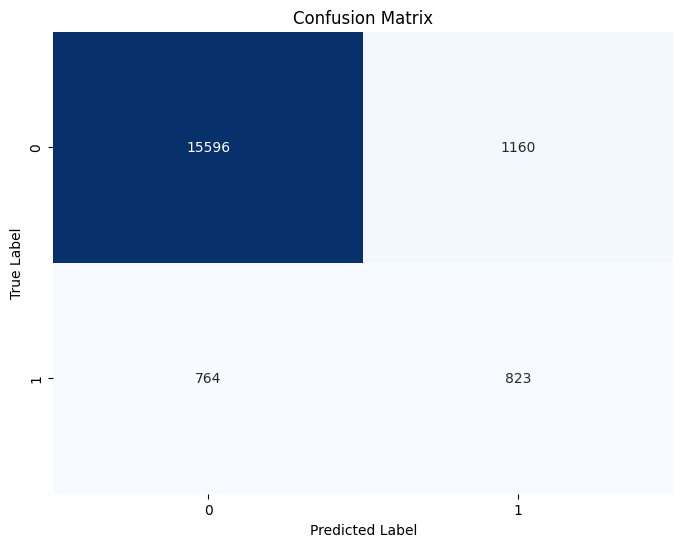

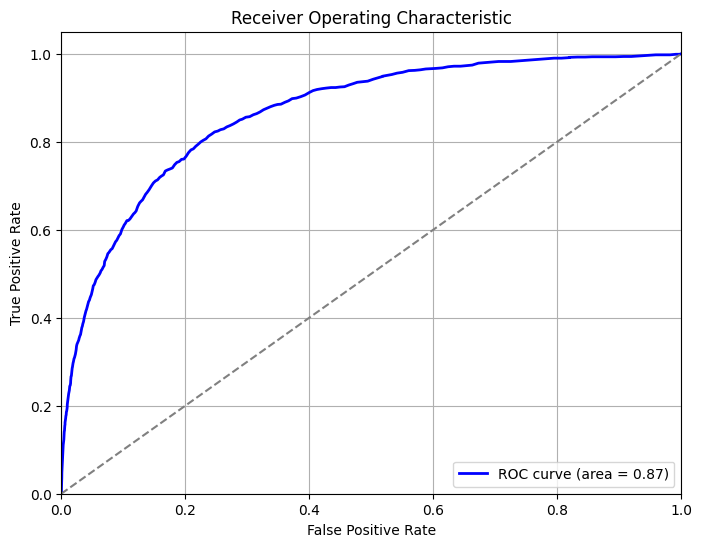

In [52]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing Class
class DataPreprocessor:
    def __init__(self, Xtrain, Ytrain, pca_components=0.95):
        self.Xtrain = np.array(Xtrain)
        self.Ytrain = np.array(Ytrain)
        self.pca_components = pca_components
        self.scaler = StandardScaler()  # Initialize the scaler
        self.pca = PCA(n_components=self.pca_components)  # Initialize PCA

        # Split into training (80%) and testing (20%) sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.Xtrain, self.Ytrain, test_size=0.2, random_state=42
        )

    def preprocess_and_resample(self):
        # Normalizing the data
        X_train_normalized = self.scaler.fit_transform(self.X_train)
        X_test_normalized = self.scaler.transform(self.X_test)

        # Apply PCA
        X_train_pca = self.pca.fit_transform(X_train_normalized)
        X_test_pca = self.pca.transform(X_test_normalized)

        # Balancing the training set only
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, self.y_train)

        return X_train_resampled, y_train_resampled, X_test_pca

    def get_pca_features(self):
        # Get the PCA-transformed features as a DataFrame for both training and testing
        _, _, X_test_pca = self.preprocess_and_resample()
        pca_feature_names = [f'PCA_{i+1}' for i in range(X_test_pca.shape[1])]
        pca_features = pd.DataFrame(X_test_pca, columns=pca_feature_names)
        return pca_features

    def get_pca_coefficients(self, feature_names):
        # Get the coefficients (loadings) of the PCA components
        pca_components_df = pd.DataFrame(self.pca.components_, columns=feature_names)
        pca_components_df.index = [f'PCA_{i+1}' for i in range(pca_components_df.shape[0])]
        return pca_components_df

# Random Forest Tuning Class
class RandomForestTuner:
    def __init__(self, X_train_resampled, y_train_resampled):
        self.X_train_resampled = X_train_resampled
        self.y_train_resampled = y_train_resampled
        self.best_rf = None

    def tune_hyperparameters(self):
        # Define the model
        rf = RandomForestClassifier(random_state=42)

        # Define the parameter grid
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
        }

        # Initialize GridSearchCV
        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                                   scoring='accuracy', n_jobs=-1, verbose=2, cv=3)

        # Fit the grid search to the training data
        grid_search.fit(self.X_train_resampled, self.y_train_resampled)

        # Get the best estimator
        self.best_rf = grid_search.best_estimator_

        return self.best_rf

    def get_best_hyperparameters(self):
        if self.best_rf is None:
            raise ValueError("You need to run tune_hyperparameters() first.")
        return self.best_rf.get_params()

# Model Evaluation Class
class ModelEvaluator:
    def __init__(self, y_test):
        self.y_test = y_test

    def evaluate_model(self, model, X_test_pca):
        # Predict on the test set
        y_test_pred = model.predict(X_test_pca)

        # Evaluate the model
        test_accuracy = accuracy_score(self.y_test, y_test_pred)
        test_precision = precision_score(self.y_test, y_test_pred)
        test_recall = recall_score(self.y_test, y_test_pred)
        test_f1 = f1_score(self.y_test, y_test_pred)

        # Create a DataFrame for the results
        results_df = pd.DataFrame(index=[model.__class__.__name__],
                                  columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                  data=[[test_accuracy, test_precision, test_recall, test_f1]])

        return results_df

    def plot_confusion_matrix(self, model, X_test_pca, class_names=None):
        # Predict on the test set
        y_test_pred = model.predict(X_test_pca)

        # Compute confusion matrix
        cm = confusion_matrix(self.y_test, y_test_pred)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

        # Add titles and labels
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')

        # Add legend for class names
        if class_names is not None:
            plt.legend(handles=[
                plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='lightblue', markersize=10, label=f'Class {class_names[0]}'),
                plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='blue', markersize=10, label=f'Class {class_names[1]}')
            ], title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')

        plt.show()

    def plot_roc_curve(self, model, X_test_pca):
        # Predict probabilities on the test set
        y_test_prob = model.predict_proba(X_test_pca)[:, 1]

        # Compute ROC curve
        fpr, tpr, _ = roc_curve(self.y_test, y_test_prob)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()

# Example usage

# Preprocess and resample the data
preprocessor = DataPreprocessor(Xtrain, Ytrain)
X_train_resampled, y_train_resampled, X_test_pca = preprocessor.preprocess_and_resample()

# Tune hyperparameters
tuner = RandomForestTuner(X_train_resampled, y_train_resampled)
best_rf = tuner.tune_hyperparameters()

# Evaluate the model
evaluator = ModelEvaluator(preprocessor.y_test)
final_results_df = evaluator.evaluate_model(best_rf, X_test_pca)
print("Final test set results:")
print(final_results_df)

# Display the PCA features created
pca_features = preprocessor.get_pca_features()
print("PCA Features:")
print(pca_features)

# Display the PCA coefficients (loadings)
feature_names = [f'Feature_{i+1}' for i in range(Xtrain.shape[1])]  # Replace with actual feature names
pca_coefficients = preprocessor.get_pca_coefficients(feature_names)
print("PCA Coefficients:")
print(pca_coefficients)

# Display the best hyperparameters chosen by tuning
best_hyperparameters = tuner.get_best_hyperparameters()
print("Best Hyperparameters for Random Forest:")
print(best_hyperparameters)

# Plot confusion matrix
evaluator.plot_confusion_matrix(best_rf, X_test_pca)

# Plot ROC curve
evaluator.plot_roc_curve(best_rf, X_test_pca)


gradientbosstingclassfier

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Final test set results:
                            Accuracy  Precision    Recall  F1-Score
GradientBoostingClassifier  0.824502    0.30204  0.699792  0.421957


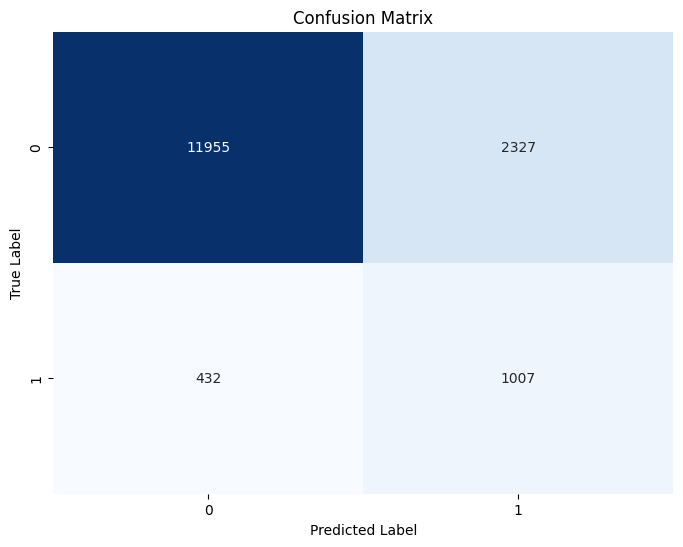

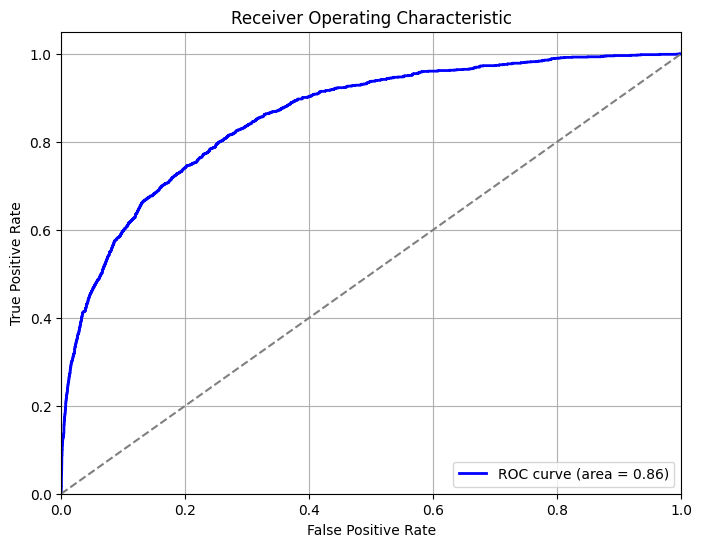

In [51]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

class DataPreprocessor:
    def __init__(self, Xtrain, Ytrain, pca_components=0.95):
        self.Xtrain = np.array(Xtrain)
        self.Ytrain = np.array(Ytrain)
        self.pca_components = pca_components
        self.scaler = StandardScaler()  # Initialize the scaler
        self.pca = PCA(n_components=self.pca_components)  # Initialize PCA

        # Split into training (80%) and testing (20%) sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.Xtrain, self.Ytrain, test_size=0.2, random_state=42
        )

    def preprocess_and_resample(self):
        # Normalizing the data
        X_train_normalized = self.scaler.fit_transform(self.X_train)
        X_test_normalized = self.scaler.transform(self.X_test)

        # Apply PCA
        X_train_pca = self.pca.fit_transform(X_train_normalized)
        X_test_pca = self.pca.transform(X_test_normalized)

        # Balancing the training set only
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, self.y_train)

        return X_train_resampled, y_train_resampled, X_test_pca


class GradientBoostingTuner:
    def __init__(self, X_train_resampled, y_train_resampled):
        self.X_train_resampled = X_train_resampled
        self.y_train_resampled = y_train_resampled

    def tune_hyperparameters(self):
        # Define the model
        gb = GradientBoostingClassifier(random_state=42)

        # Define a smaller parameter grid
        param_grid = {
            'n_estimators': [50, 100],  # Fewer estimators to speed up training
            'max_depth': [3, 5],  # Shallower trees for faster training
            'learning_rate': [0.1, 0.05],  # Try a couple of learning rates
            'subsample': [0.8, 1.0]  # Use subsampling to reduce overfitting and speed up training
        }

        # Initialize GridSearchCV with early stopping enabled
        grid_search = GridSearchCV(estimator=gb, param_grid=param_grid,
                                   scoring='accuracy', n_jobs=-1, verbose=2, cv=3)

        # Fit the grid search to the training data
        grid_search.fit(self.X_train_resampled, self.y_train_resampled)

        # Get the best estimator
        best_gb = grid_search.best_estimator_

        return best_gb


class ModelEvaluator:
    def __init__(self, y_test):
        self.y_test = y_test

    def evaluate_model(self, model, X_test_pca):
        # Predict on the test set
        y_test_pred = model.predict(X_test_pca)

        # Evaluate the model
        test_accuracy = accuracy_score(self.y_test, y_test_pred)
        test_precision = precision_score(self.y_test, y_test_pred)
        test_recall = recall_score(self.y_test, y_test_pred)
        test_f1 = f1_score(self.y_test, y_test_pred)

        # Create a DataFrame for the results
        results_df = pd.DataFrame(index=[model.__class__.__name__],
                                  columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                  data=[[test_accuracy, test_precision, test_recall, test_f1]])

        return results_df

    def plot_confusion_matrix(self, model, X_test_pca):
        # Predict on the test set
        y_test_pred = model.predict(X_test_pca)

        # Compute confusion matrix
        cm = confusion_matrix(self.y_test, y_test_pred)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

    def plot_roc_curve(self, model, X_test_pca):
        # Predict probabilities on the test set
        y_test_prob = model.predict_proba(X_test_pca)[:, 1]

        # Compute ROC curve
        fpr, tpr, _ = roc_curve(self.y_test, y_test_prob)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()


# Example usage

# Preprocess and resample the data
preprocessor = DataPreprocessor(Xtrain, Ytrain)
X_train_resampled, y_train_resampled, X_test_pca = preprocessor.preprocess_and_resample()

# Tune hyperparameters for Gradient Boosting
tuner = GradientBoostingTuner(X_train_resampled, y_train_resampled)
best_gb = tuner.tune_hyperparameters()

# Evaluate the model
evaluator = ModelEvaluator(preprocessor.y_test)
final_results_df = evaluator.evaluate_model(best_gb, X_test_pca)
print("Final test set results:")
print(final_results_df)

# Plot confusion matrix
evaluator.plot_confusion_matrix(best_gb, X_test_pca)

# Plot ROC curve
evaluator.plot_roc_curve(best_gb, X_test_pca)


GradientBoostingClassifier

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best hyperparameters found:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Final test set results:
                            Accuracy  Precision    Recall  F1-Score
GradientBoostingClassifier  0.824502    0.30204  0.699792  0.421957


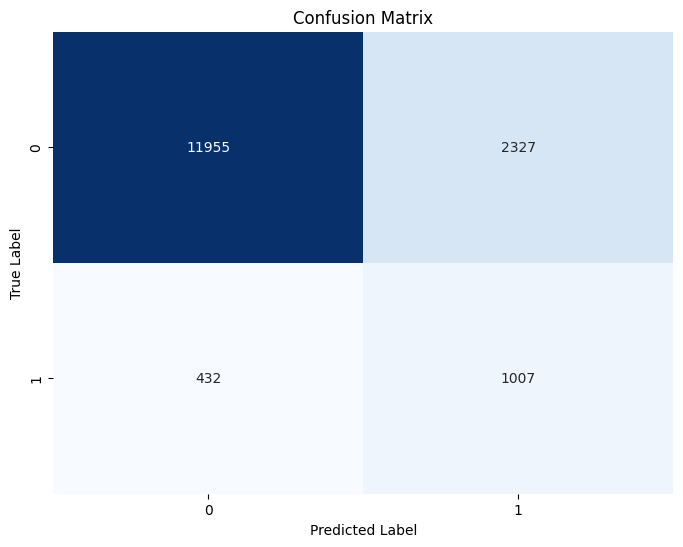

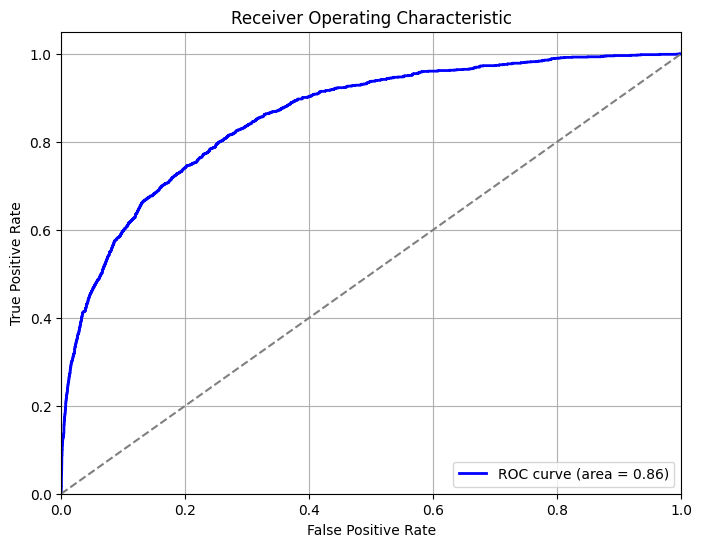

In [52]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

class DataPreprocessor:
    def __init__(self, Xtrain, Ytrain, pca_components=0.95):
        self.Xtrain = np.array(Xtrain)
        self.Ytrain = np.array(Ytrain)
        self.pca_components = pca_components
        self.scaler = StandardScaler()  # Initialize the scaler
        self.pca = PCA(n_components=self.pca_components)  # Initialize PCA

        # Split into training (80%) and testing (20%) sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.Xtrain, self.Ytrain, test_size=0.2, random_state=42
        )

    def preprocess_and_resample(self):
        # Normalizing the data
        X_train_normalized = self.scaler.fit_transform(self.X_train)
        X_test_normalized = self.scaler.transform(self.X_test)

        # Apply PCA
        X_train_pca = self.pca.fit_transform(X_train_normalized)
        X_test_pca = self.pca.transform(X_test_normalized)

        # Balancing the training set only
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, self.y_train)

        return X_train_resampled, y_train_resampled, X_test_pca


class GradientBoostingTuner:
    def __init__(self, X_train_resampled, y_train_resampled):
        self.X_train_resampled = X_train_resampled
        self.y_train_resampled = y_train_resampled

    def tune_hyperparameters(self):
        # Define the model
        gb = GradientBoostingClassifier(random_state=42)

        # Define a smaller parameter grid
        param_grid = {
            'n_estimators': [50, 100],  # Fewer estimators to speed up training
            'max_depth': [3, 5],  # Shallower trees for faster training
            'learning_rate': [0.1, 0.05],  # Try a couple of learning rates
            'subsample': [0.8, 1.0]  # Use subsampling to reduce overfitting and speed up training
        }

        # Initialize GridSearchCV with early stopping enabled
        grid_search = GridSearchCV(estimator=gb, param_grid=param_grid,
                                   scoring='accuracy', n_jobs=-1, verbose=2, cv=3)

        # Fit the grid search to the training data
        grid_search.fit(self.X_train_resampled, self.y_train_resampled)

        # Get the best estimator
        best_gb = grid_search.best_estimator_

        # Print the best hyperparameters
        print("Best hyperparameters found:")
        print(grid_search.best_params_)

        return best_gb


class ModelEvaluator:
    def __init__(self, y_test):
        self.y_test = y_test

    def evaluate_model(self, model, X_test_pca):
        # Predict on the test set
        y_test_pred = model.predict(X_test_pca)

        # Evaluate the model
        test_accuracy = accuracy_score(self.y_test, y_test_pred)
        test_precision = precision_score(self.y_test, y_test_pred)
        test_recall = recall_score(self.y_test, y_test_pred)
        test_f1 = f1_score(self.y_test, y_test_pred)

        # Create a DataFrame for the results
        results_df = pd.DataFrame(index=[model.__class__.__name__],
                                  columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                  data=[[test_accuracy, test_precision, test_recall, test_f1]])

        return results_df

    def plot_confusion_matrix(self, model, X_test_pca):
        # Predict on the test set
        y_test_pred = model.predict(X_test_pca)

        # Compute confusion matrix
        cm = confusion_matrix(self.y_test, y_test_pred)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

    def plot_roc_curve(self, model, X_test_pca):
        # Predict probabilities on the test set
        y_test_prob = model.predict_proba(X_test_pca)[:, 1]

        # Compute ROC curve
        fpr, tpr, _ = roc_curve(self.y_test, y_test_prob)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()


# Example usage

# Preprocess and resample the data
preprocessor = DataPreprocessor(Xtrain, Ytrain)
X_train_resampled, y_train_resampled, X_test_pca = preprocessor.preprocess_and_resample()

# Tune hyperparameters for Gradient Boosting
tuner = GradientBoostingTuner(X_train_resampled, y_train_resampled)
best_gb = tuner.tune_hyperparameters()

# Evaluate the model
evaluator = ModelEvaluator(preprocessor.y_test)
final_results_df = evaluator.evaluate_model(best_gb, X_test_pca)
print("Final test set results:")
print(final_results_df)

# Plot confusion matrix
evaluator.plot_confusion_matrix(best_gb, X_test_pca)

# Plot ROC curve
evaluator.plot_roc_curve(best_gb, X_test_pca)


# 5.4 Final results

RandomForestClassifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

class DataPreprocessor:
    def __init__(self, Xtrain, Ytrain, Xtest, Ytest, pca_components=0.95):
        self.X_train = np.array(Xtrain)
        self.y_train = np.array(Ytrain)
        self.X_test = np.array(Xtest)
        self.y_test = np.array(Ytest)
        self.pca_components = pca_components
        self.scaler = StandardScaler()
        self.pca = PCA(n_components=self.pca_components)

    def preprocess_and_resample(self):
        # Normalizing the data
        X_train_normalized = self.scaler.fit_transform(self.X_train)
        X_test_normalized = self.scaler.transform(self.X_test)

        # Apply PCA
        X_train_pca = self.pca.fit_transform(X_train_normalized)
        X_test_pca = self.pca.transform(X_test_normalized)

        # Balancing the training set only
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, self.y_train)

        return X_train_resampled, y_train_resampled, X_test_pca

    def fill_nan_y_test(self, model, X_test_pca):
        # Fill NaN values in y_test with predictions
        nan_indices = np.isnan(self.y_test)
        if np.any(nan_indices):
            y_test_pred = model.predict(X_test_pca[nan_indices])
            self.y_test[nan_indices] = y_test_pred
        return self.y_test

class RandomForestModel:
    def __init__(self, X_train_resampled, y_train_resampled):
        self.X_train_resampled = X_train_resampled
        self.y_train_resampled = y_train_resampled

    def train_model(self):
        # Define the model with specific parameters
        rf = RandomForestClassifier(max_depth=None, n_estimators=300, random_state=42)
        rf.fit(self.X_train_resampled, self.y_train_resampled)
        return rf

# Example usage for RandomForest

# Preprocess and resample the data
preprocessor = DataPreprocessor(Xtrain, Ytrain, Xtest, Ytest)
X_train_resampled, y_train_resampled, X_test_pca = preprocessor.preprocess_and_resample()

# Train the RandomForest model
rf_model = RandomForestModel(X_train_resampled, y_train_resampled)
trained_rf_model = rf_model.train_model()

# Fill NaN values in Ytest
y_test_filled = preprocessor.fill_nan_y_test(trained_rf_model, X_test_pca)

# Create a DataFrame with the filled y_test
y_test_filled_df = pd.DataFrame({'Filled_Ytest': y_test_filled})

# Save the DataFrame to a CSV file
y_test_filled_df.to_csv('filled_ytest.csv', index=False)

print("NaN values in Ytest have been filled and saved to 'filled_ytest.csv'.")


NaN values in Ytest have been filled and saved to 'filled_ytest.csv'.


GradientBoostingClassfier

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

class DataPreprocessor:
    def __init__(self, Xtrain, Ytrain, Xtest, Ytest, pca_components=0.95):
        self.X_train = np.array(Xtrain)
        self.y_train = np.array(Ytrain)
        self.X_test = np.array(Xtest)
        self.y_test = np.array(Ytest)
        self.pca_components = pca_components
        self.scaler = StandardScaler()
        self.pca = PCA(n_components=self.pca_components)

    def preprocess_and_resample(self):
        # Normalizing the data
        X_train_normalized = self.scaler.fit_transform(self.X_train)
        X_test_normalized = self.scaler.transform(self.X_test)

        # Apply PCA
        X_train_pca = self.pca.fit_transform(X_train_normalized)
        X_test_pca = self.pca.transform(X_test_normalized)

        # Balancing the training set only
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, self.y_train)

        return X_train_resampled, y_train_resampled, X_test_pca

    def fill_nan_y_test(self, model, X_test_pca):
        # Fill NaN values in y_test with predictions
        nan_indices = np.isnan(self.y_test)
        if np.any(nan_indices):
            y_test_pred = model.predict(X_test_pca[nan_indices])
            self.y_test[nan_indices] = y_test_pred
        return self.y_test

class GradientBoostingModel:
    def __init__(self, X_train_resampled, y_train_resampled):
        self.X_train_resampled = X_train_resampled
        self.y_train_resampled = y_train_resampled

    def train_model(self):
        # Define the model with specific parameters
        gb = GradientBoostingClassifier(
            learning_rate=0.1,
            max_depth=5,
            n_estimators=100,
            subsample=0.8,
            random_state=42
        )
        gb.fit(self.X_train_resampled, self.y_train_resampled)
        return gb

# Example usage for GradientBoosting

# Preprocess and resample the data
preprocessor = DataPreprocessor(Xtrain, Ytrain, Xtest, Ytest)
X_train_resampled, y_train_resampled, X_test_pca = preprocessor.preprocess_and_resample()

# Train the GradientBoosting model
gb_model = GradientBoostingModel(X_train_resampled, y_train_resampled)
trained_gb_model = gb_model.train_model()

# Fill NaN values in Ytest
y_test_filled = preprocessor.fill_nan_y_test(trained_gb_model, X_test_pca)

# Create a DataFrame with the filled y_test
y_test_filled_df = pd.DataFrame({'Filled_Ytest': y_test_filled})

# Save the DataFrame to a CSV file
y_test_filled_df.to_csv('filled_ytest_gb.csv', index=False)

print("NaN values in Ytest have been filled and saved to 'filled_ytest_gb.csv'.")


NaN values in Ytest have been filled and saved to 'filled_ytest_gb.csv'.
